# Проект 2 модуля. Исследование стартапов

Сакович Мария, 07.10.2025

# Введение

Проект связан с исследованием финансирования стартапов. В ходе исследования будут проанализированы данные за 2000-2014 год, содержащие информацию о финансируемых компаниях, источниках и суммах этого финансирования, а также о возвратах инвестиций. Также будут рассмотрены различные отрасли рынка и сделаны предположения о перспективности инвестиций в те или иные из них. 

## Знакомство с данными: загрузка и предобработка



### Вывод общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from matplotlib.patches import Patch

In [3]:
pd.options.display.max_columns = None

In [4]:
!pip install missingno
import missingno as msno

In [ ]:
#Загрузим датасет  о компаниях и состоявшемся финансировании:
df=pd.read_csv( sep=';', low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.tail()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Создадим копию датасета
df_shape=df.shape

In [10]:
df_shape

(54294, 40)

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.




Датасет в файле `cb_investments.csv` представлен 54294 строками и 40 столбцами и содержит информацию о компаниях и состоявшемся финансировании. Содержится большое количество пропусков, присутствуют во всех столбцах. 

Данные соответствуют описанию. Требуется отформатировать названия столбцов (убрать лишние пробелы и перевести в snake_case), а также исправить типы данных в столбцах:

```
Название столбца       | Тип данных
-----------------------|---------------------------
funding_rounds         | int с понижением разрядности
participants           | int с понижением разрядности
founded_at             | datetime
founded_month          | datetime
founded_quarter        | datetime
founded_year           | int с понижением разрядности
first_funding_at       | datetime
mid_funding_at         | datetime
last_funding_at        | datetime
seed                   | int
venture                | int
equity_crowdfunding    | int
undisclosed            | int
convertible_note       | int
debt_financing         | int
angel                  | int
grant                  | int
private_equity         | int
post_ipo_equity        | int
post_ipo_debt          | int
secondary_market       | int
product_crowdfunding   | int
round_A-H              | int
```

В конце датасета содержатся строки, состоящие из пустых ячеек - на этапе обработки данных необходимо первым делом их удалить. 

Выведем основные статистические показатели исходного датасета

In [11]:
df.describe()

,funding_rounds,participants,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,30473.000000,38554.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,1.451646,2007.094231,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,2.074286e+06,6.088736e+05,4.434360e+05,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,2.022233,9.862177,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,3.167231e+07,2.678348e+07,3.428169e+07,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,0.000000,1636.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,0.000000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,36.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


Дополнительно - то, что не поместилось в таблице выше.

In [12]:
df.describe().iloc[:,17:21]

,round_B,round_C,round_D,round_E
count,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05
std,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08


Можно заметить, что присутствуют отрицательные значения (строка min) в столбцах с суммами из разных источников, причем везде - одинаковые -2.147484e+09. Мы вернемся к этому на этапе предобработки данных.

In [ ]:
#Загрузим второй датасет, присвоим индексом первый (нулевой) столбце - с годом
returns_df=pd.read_csv(, index_col='year')

In [14]:
#Выведем информацию о датасете
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2000 to 2014
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   seed                  15 non-null     float64
 1   venture               15 non-null     float64
 2   equity_crowdfunding   15 non-null     float64
 3   undisclosed           15 non-null     float64
 4   convertible_note      15 non-null     float64
 5   debt_financing        15 non-null     float64
 6   angel                 15 non-null     float64
 7   grant                 15 non-null     float64
 8   private_equity        15 non-null     float64
 9   post_ipo_equity       15 non-null     float64
 10  post_ipo_debt         15 non-null     float64
 11  secondary_market      15 non-null     float64
 12  product_crowdfunding  15 non-null     float64
dtypes: float64(13)
memory usage: 1.6 KB


In [15]:
#Выведем датасет целиком, поскольку в нем всего 15 строк
returns_df

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.00,0.20,0.00
2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.00,0.46,0.00
2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.00,0.06,0.00
2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.00,0.08,0.00
2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.00,0.55,0.00
2005,26.60,2628.92,0.00,9.51,0.02,35.09,31.06,0.0,2.40,3.51,0.00,0.05,0.00
2006,61.81,3100.18,0.19,46.74,1.78,113.21,47.75,0.0,16.67,20.58,0.00,0.12,0.00
2007,70.41,3585.37,0.01,55.37,3.22,125.68,164.51,0.0,88.81,24.36,0.00,0.57,0.00
2008,89.72,2717.02,0.03,41.02,1.71,397.54,102.83,0.0,130.38,84.28,0.00,0.47,0.00


Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.


**Предварительные выводы:**
- Данные представлены двумя датасетами
- Один датасет df содержит информацию о компаниях и состоявшемся финансировании и соответствует описанию, он содержит 54294 строк и 40 столбцов, большое количество пропусков, пропуски присутствуют во всех столбцах. Присутствует ошибка написания в названии столбца - лишние пробелы - требует исправления. Типы данных в датасете также требуют исправления: большое количество столбцов, содержащих числовые данные и формат даты - содержатся в строковом формате. Дополнительно можно перевести вещественный тип в целочисленный с понижением разрядности для некоторых столбцов. Обнаружено, что в конце датасета присутствуют пустые строки (содержащие пропуски во всех столбцах). присутствуют отрицательные значения (строка min) в столбцах `venture`, `debt_financing`, `private_equity`,`post_ipo_equity`, `post_ipo_debt`, причем везде - одинаковые -2.147484e+09	
- Второй датасет returns содержит информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов и соответствует описанию, он содержит 15 строк и 13 столбцов (столбец с годом при загрузке файла сделали индексами), пропуски отсутствуют, типы данных корректны (вещественный тип). 

### Предобработка данных

Проверим названия столбцов в датасетах и отформатируем к единому стилю.

In [16]:
df.columns

Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [17]:
#Отбросим лишние пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# Приведем их к snake_case
df.columns = df.columns.str.lower()

На превью датасета  (df.head()) можно было заметить, что в `funding_total_usd` присутствуют запятые для выделения разрядов, которые помешают перевести в целочисленный тип. 

In [18]:
#Отбросим лишние пробелы
df['funding_total_usd']=df['funding_total_usd'].str.strip()
#Создадим маску с помощью метода to_numeric и параметра errors='coerce'
converted = pd.to_numeric(df['funding_total_usd'], errors='coerce') 
#Применим маску к исходному датасету для поиска нечисловых значений
non_numeric_rows = df[converted.isna()]
#Выведем уникальные значения
non_numeric_rows['funding_total_usd'].sort_values().unique()

array(['-', '1,00,00,00,000', '1,00,00,000', ..., '99,99,997',
       '99,99,999', nan], dtype=object)

In [19]:
#Заменим лишние запятые на пустую строку, а дефисы (прочерки) - на NaN. 
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','').replace('-',np.NaN)

In [20]:
#Попробуем перевести значения, которые содержат числовые данные, в вещественный тип.
for column in ['funding_total_usd','seed','venture','equity_crowdfunding','undisclosed',
               'convertible_note','debt_financing','angel','grant','private_equity',
               'post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding',
               'round_a','round_b','round_c','round_d','round_e','round_f','round_g','round_h']:
    try:
        df[column]=df[column].astype('float')
    except ValueError as e:
        print(f"Ошибка значения в столбце {column}: {e}")
    except TypeError as e:
        print(f"Ошибка типа в столбце {column}: {e}")
    except Exception as e:
        print(f"Неизвестная ошибка в столбце {column}: {e}")
    else:
        print(f"Тип данных изменен в столбце {column} изменен!")

Тип данных изменен в столбце funding_total_usd изменен!
Тип данных изменен в столбце seed изменен!
Тип данных изменен в столбце venture изменен!
Тип данных изменен в столбце equity_crowdfunding изменен!
Тип данных изменен в столбце undisclosed изменен!
Тип данных изменен в столбце convertible_note изменен!
Тип данных изменен в столбце debt_financing изменен!
Тип данных изменен в столбце angel изменен!
Тип данных изменен в столбце grant изменен!
Тип данных изменен в столбце private_equity изменен!
Тип данных изменен в столбце post_ipo_equity изменен!
Тип данных изменен в столбце post_ipo_debt изменен!
Тип данных изменен в столбце secondary_market изменен!
Тип данных изменен в столбце product_crowdfunding изменен!
Тип данных изменен в столбце round_a изменен!
Тип данных изменен в столбце round_b изменен!
Тип данных изменен в столбце round_c изменен!
Тип данных изменен в столбце round_d изменен!
Тип данных изменен в столбце round_e изменен!
Тип данных изменен в столбце round_f изменен!
Ти

Больше нечисловых значений в столбцах с числовыми данными нет, тип данных изменены на вещественный тип. Если на этапе обработки пропусков удастся заполнить пропуски, то сможем перевести в целочисленный тип. 


Попробуем поменять типы данных в столбцах, которые хранят значения даты и времени.

In [21]:
for column in ['founded_at','founded_month','founded_quarter','first_funding_at','mid_funding_at','last_funding_at']:
    try:
        df[column]=pd.to_datetime(df[column])
    except ValueError as e:
        print(f"Ошибка значения в столбце {column}: {e}")
    except TypeError as e:
        print(f"Ошибка типа в столбце {column}: {e}")
    except Exception as e:
        print(f"Неизвестная ошибка в столбце {column}: {e}")
    else:
        print(f"Тип данных изменен в столбце {column} изменен!")

Ошибка значения в столбце founded_at: Out of bounds nanosecond timestamp: 1636-09-08, at position 0
Тип данных изменен в столбце founded_month изменен!
Тип данных изменен в столбце founded_quarter изменен!
Ошибка значения в столбце first_funding_at: Out of bounds nanosecond timestamp: 0011-11-14, at position 2177. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Тип данных изменен в столбце mid_funding_at изменен!
Ошибка значения в столбце last_funding_at: Out of bounds nanosecond timestamp: 0001-05-14, at position 37546. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37448\2426505017.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37448\2426505017.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])


На каких данных возникли ошибки при изменении типов данных на типы даты/времени:

- В столбце founded_at присутствует значение 1636-09-08 , которое выходит за пределы диапазона.
- В столбце first_funding_at произошла ошибка на значении 0011-11-14, которое выходит за пределы диапазона, который может обработать pandas и которое, очевидно, ошибочно. Аналогично, в last_funding_at - на 0001-05-14. 

In [22]:
#Проверим, какие значения не удается перевести в формат даты в столбце founded_at
df['founded_at']=df['founded_at'].str.strip()
#Создадим маску с помощью метода to_datetime и параметра errors='coerce'
converted = pd.to_datetime(df['founded_at'], errors='coerce') 
#Применим маску к исходному датасету для поиска значений, дающих ошибку при попытке изменить тип данных
non_numeric_rows = df[converted.isna()]
#Выведем уникальные значения
non_numeric_rows['founded_at'].sort_values().unique()       

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37448\2258030589.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  converted = pd.to_datetime(df['founded_at'], errors='coerce')


array(['1636-09-08', nan], dtype=object)

In [23]:
#Дата 1636-09-08 находится за пределами диапазона, который может обработать pandas, очистим это значение ,
#поскольку год основания не требуется для выполнения задачи
df['founded_at']=pd.to_datetime(df['founded_at'], errors='coerce') 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37448\1193530245.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['founded_at']=pd.to_datetime(df['founded_at'], errors='coerce')


Для столбцов first_funding_at и last_funding_at  проверим, есть ли еще  значения, начинающиеся с "00", выведем для них информацию о датах и суммах.

In [24]:
col_4 = df.iloc[:, 4]
cols_16_18 = df.iloc[:, 12:19]  # Столбцы с 12 по 18
last_21_cols = df.iloc[:, -21:] # Последние 21 столбец

# Объединяем по горизонтали
result = pd.concat([col_4,cols_16_18, last_21_cols], axis=1)
result[(result['first_funding_at'].str.startswith('0'))|(result['last_funding_at'].str.startswith('0'))]

,funding_total_usd,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
2177,18000000.0,1997-01-01,1997-01-01,1997-01-01,1997.0,0011-11-14,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27830,NaN,2012-01-01,2012-01-01,2012-01-01,2012.0,0019-11-20,NaT,2013-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31854,NaN,2012-08-01,2012-08-01,2012-07-01,2012.0,0020-06-14,2013-06-01,2013-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33041,16300000.0,2013-01-01,2013-01-01,2013-01-01,2013.0,0007-05-13,NaT,2014-09-25,2000000.0,14300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37546,NaN,2014-01-10,2014-01-01,2014-01-01,2014.0,0001-05-14,NaT,0001-05-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38506,NaN,2014-10-01,2014-10-01,2014-10-01,2014.0,0201-01-01,NaT,0201-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38554,NaN,NaT,NaT,NaT,NaN,0001-07-14,NaT,0001-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38555,NaN,NaT,NaT,NaT,NaN,0001-11-14,NaT,0001-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38556,NaN,NaT,NaT,NaT,NaN,0026-11-14,NaT,0026-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38557,NaN,NaT,NaT,NaT,NaN,0029-09-14,NaT,0029-09-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В датасете присутствуют 10 строк, в которых значения в столбце first_funding_at или last_funding_at начинаются с "0". Из них только для двух строк сумма инвестиций - не 0. 
- 0011-11-14 в столбце first_funding_at - возможно, это некорректная запись. mid_funding_at и last_funding_at при этом 2012-07-24, т.е. first_funding_at должно было быть раньше. сделаем предположение, что необходимо исправить на 2011-11-14	
- 0007-05-13 в столбце first_funding_at - возможно, это некорректная запись 07-05-2013, поскольку дата основания и дата последнего финансирования относятся к 2013 и 2014 году. Заменим '0007-05-13' на '2013-05-07'

Остальные строки следует удалить, т.к. они не несут информации о финансировании.

In [25]:
#Заменяем ошибочные значения
df.first_funding_at=df.first_funding_at.str.replace('0007-05-13','2013-05-07')
df.first_funding_at=df.first_funding_at.str.replace('0011-11-14','2011-11-14')

In [26]:
#Остальные ошибочные - удаляем
for column in ['first_funding_at','last_funding_at']:
    df=df[~df[column].str.startswith('0',na=False)]

In [27]:
for column in ['founded_at','founded_month','founded_quarter','first_funding_at','mid_funding_at','last_funding_at']:
    try:
        df[column]=pd.to_datetime(df[column], format='%Y-%m-%d')
    except ValueError as e:
        print(f"Ошибка значения в столбце {column}: {e}")
    except TypeError as e:
        print(f"Ошибка типа в столбце {column}: {e}")
    except Exception as e:
        print(f"Неизвестная ошибка в столбце {column}: {e}")
    else:
        print(f"Тип данных изменен в столбце {column} изменен!")

Тип данных изменен в столбце founded_at изменен!
Тип данных изменен в столбце founded_month изменен!
Тип данных изменен в столбце founded_quarter изменен!
Тип данных изменен в столбце first_funding_at изменен!
Тип данных изменен в столбце mid_funding_at изменен!
Тип данных изменен в столбце last_funding_at изменен!


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54286 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49429 non-null  object        
 1   homepage_url          45981 non-null  object        
 2   category_list         45470 non-null  object        
 3   market                45470 non-null  object        
 4   funding_total_usd     40907 non-null  float64       
 5   status                48116 non-null  object        
 6   country_code          44161 non-null  object        
 7   state_code            30161 non-null  object        
 8   region                44161 non-null  object        
 9   city                  43318 non-null  object        
 10  funding_rounds        49430 non-null  float64       
 11  participants          30472 non-null  float64       
 12  founded_at            38549 non-null  datetime64[ns]
 13  founded_month        

In [29]:
#Удалим лишние пробелы в строковых столбцах
string_columns = ['name','category_list','market','status','country_code','state_code','region','city']
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())


### Обработка пропущенных значений

В первую очередь необходимо удалить полностью пустые строки (состоящие из пропущенных значений). 


In [30]:
df = df.dropna(how='all')

In [31]:
print(f'Удалено {df_shape[0]-df.shape[0]} пустых строк')

Удалено 4864 пустых строк


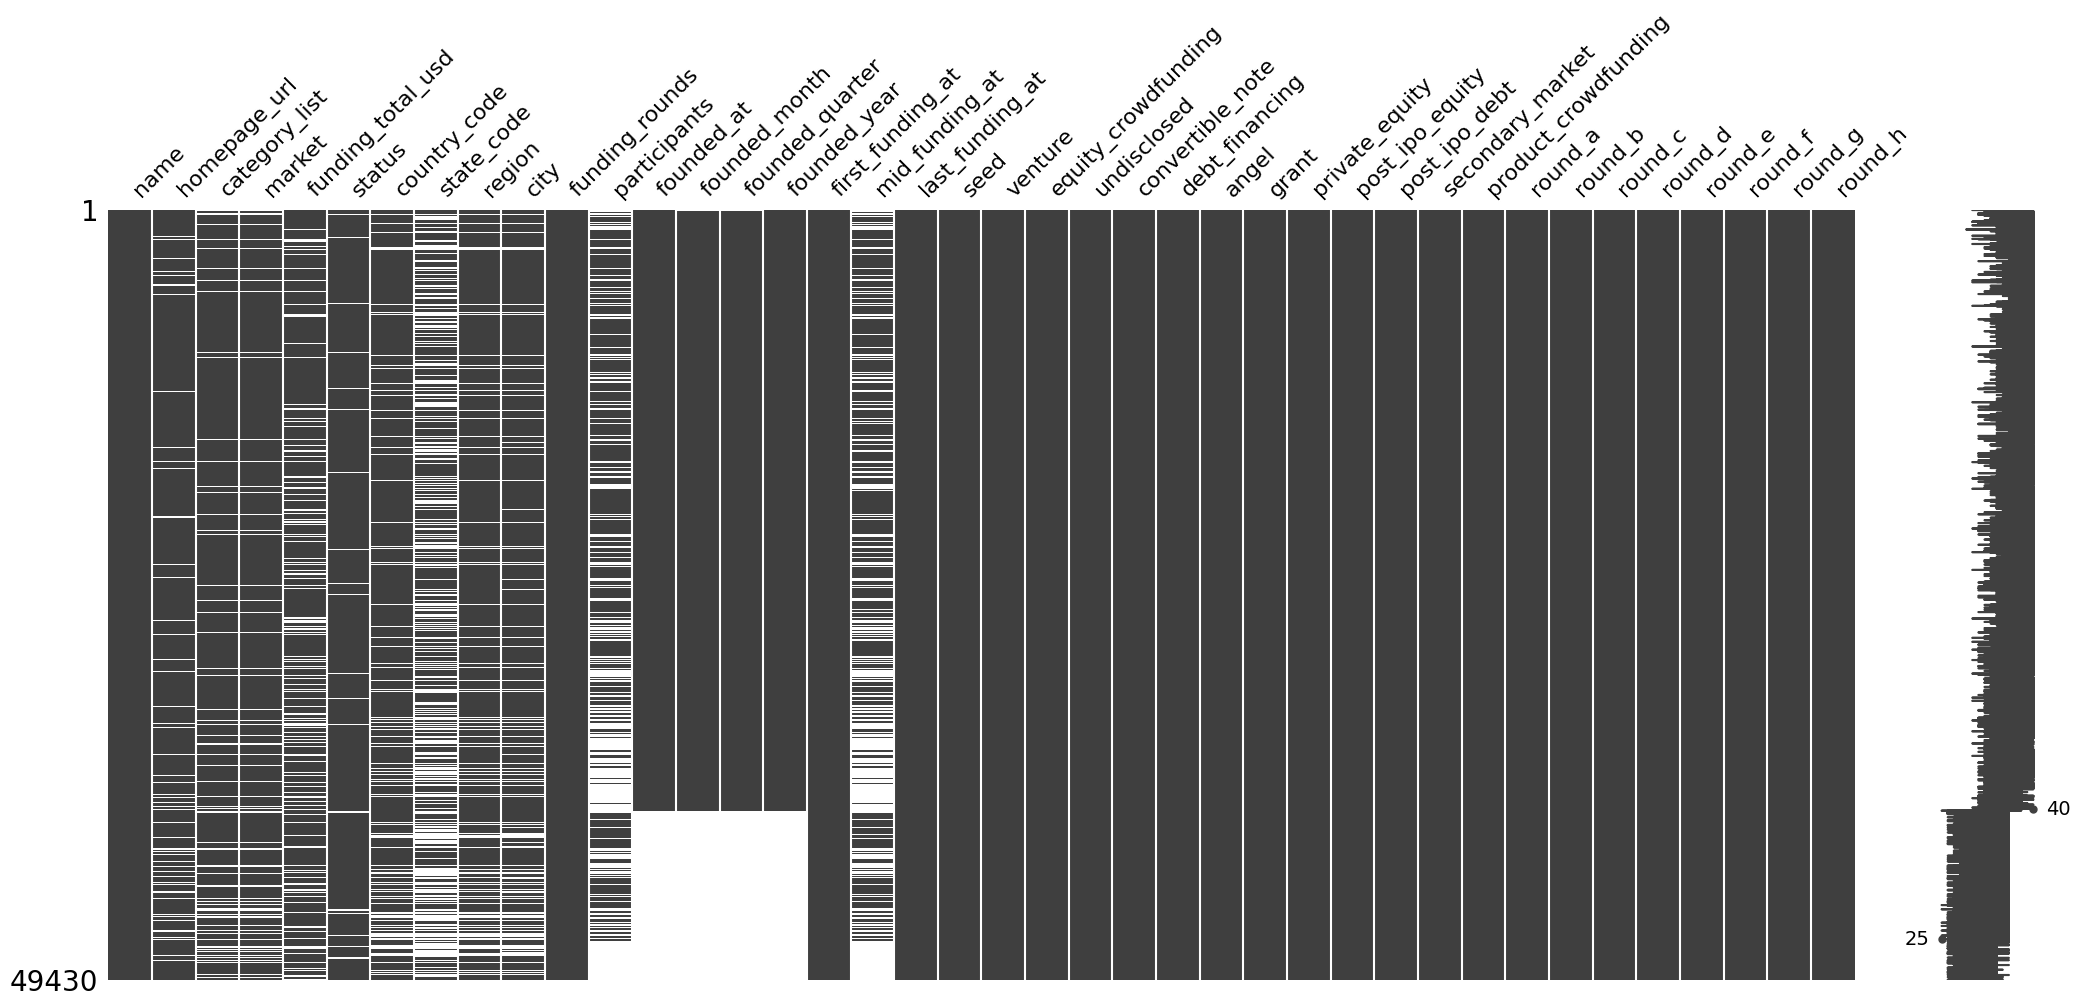

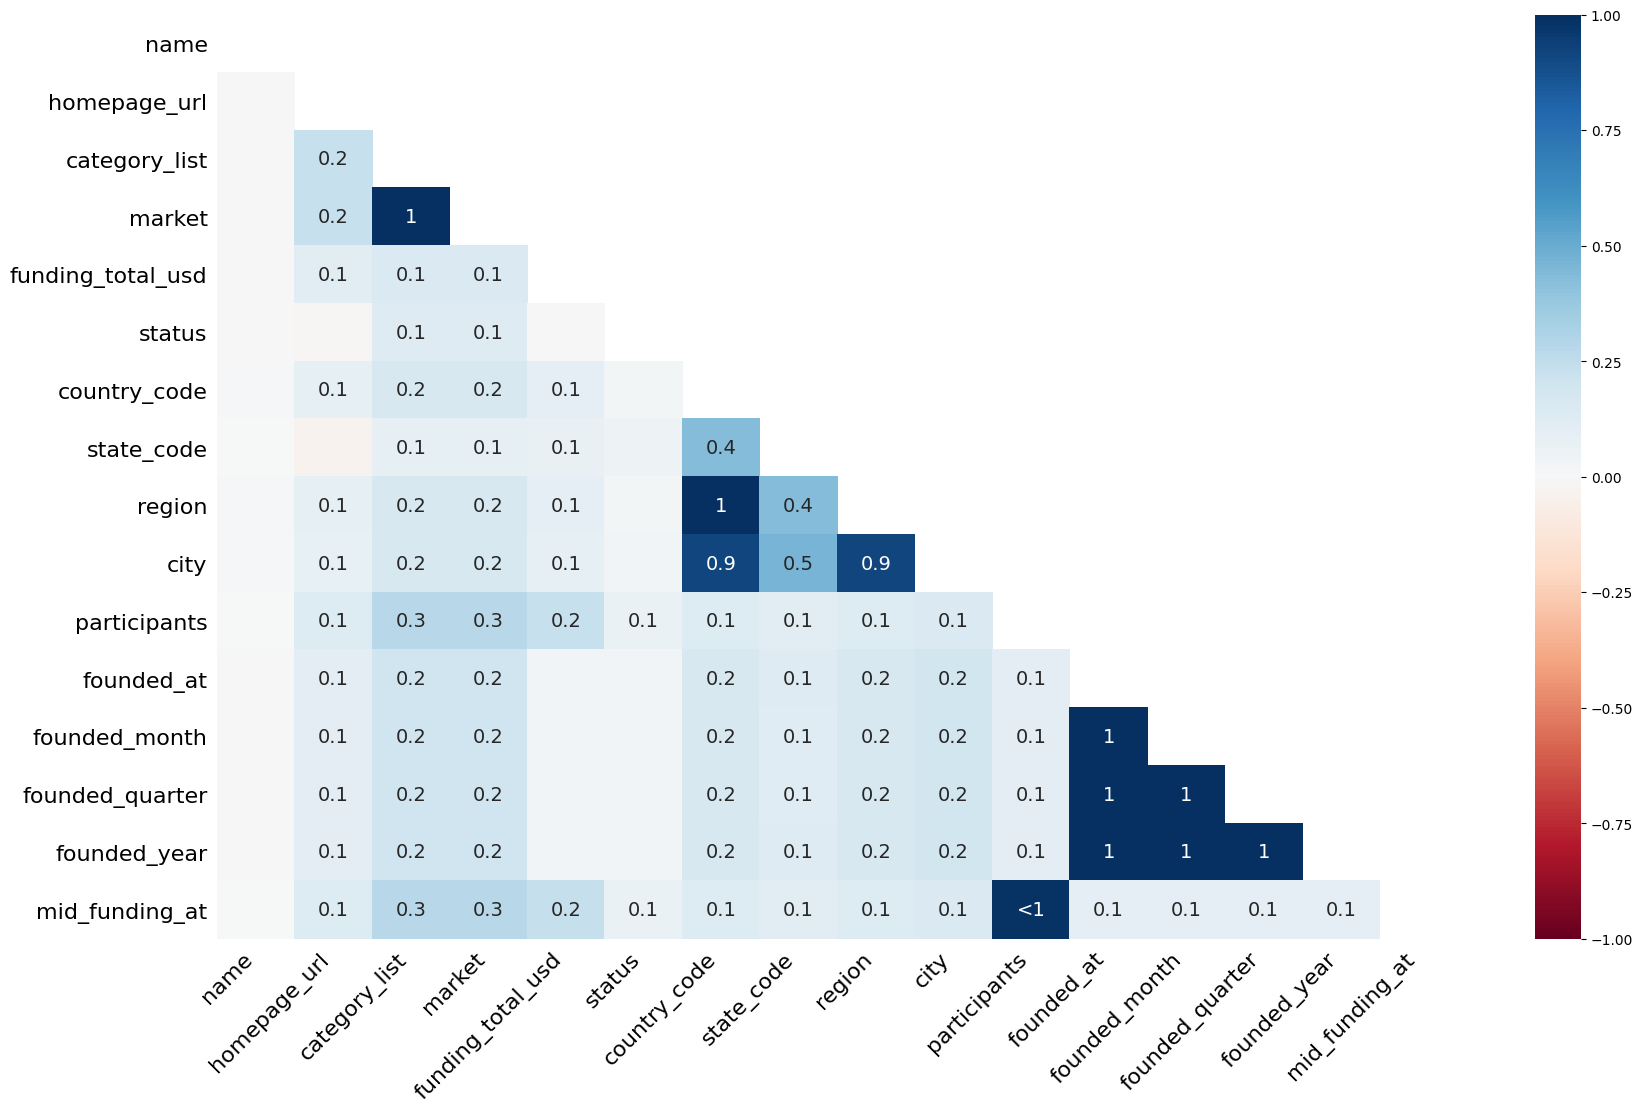

In [32]:
msno.matrix(df)
msno.heatmap(df)
plt.show()

По диаграммам выше можем заметить, что присутствует сильная корреляция между пропусками:

- в столбцах market и category_list

- в столбцах, отвещающих за географические данные - region, country_code, city

- в столбцах, связанных с датой - founded_at, founded_month, founded_quarter

- в столбцах participants и mid_funding_at

Для первых трех пунктов взаимосвязь пропусков очевидна. Вероятно, наличие пропусков связано с парсингом. 
Из всех значений столбцов, имеющих сильную корреляцию с другим столбцом/столбцами нам для исследования интересен только столбцы market и mid_funding_at.

In [33]:
#Проверим количества пропусков в столбцах после удаления пустых строк
df.isna().sum().sort_values(ascending=False)


state_code              19269
mid_funding_at          19143
participants            18958
founded_month           10952
founded_quarter         10952
founded_at              10881
founded_year            10880
funding_total_usd        8523
city                     6112
country_code             5269
region                   5269
category_list            3960
market                   3960
homepage_url             3449
status                   1314
name                        1
round_f                     0
post_ipo_equity             0
round_e                     0
round_d                     0
round_g                     0
round_c                     0
round_b                     0
round_a                     0
product_crowdfunding        0
secondary_market            0
post_ipo_debt               0
venture                     0
private_equity              0
grant                       0
angel                       0
debt_financing              0
convertible_note            0
undisclose

Сразу заметно сократилось количество столбцов, содержащих пропуски - теперь это столбцы с 0 по 9, с 11 по 15, и 17. Но их всё еще много. 

На этапе знакомства с данными было обнаружено, что в датасете присутствуют отрицательные значения (строка min) в столбцах с суммами финансирования из разных источников, причем везде - одинаковые -2.147484e+09	

-2147483648 - это минимальное значение для 32-битного целого числа (int32), это индикатор, которым были заменены пропуски в исходных данных. Заменим индикатор на 0. 

In [34]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

for i in numeric_columns:
    df.loc[df[i] == -2147483648, i] = 0

df[numeric_columns].describe()

,funding_total_usd,funding_rounds,participants,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
count,4.090700e+04,49430.000000,30472.000000,38550.000000,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04
mean,1.591253e+07,1.696257,1.451693,2007.093619,2.173567e+05,7.502265e+06,6.164320e+03,1.302424e+05,2.336788e+04,1.888462e+06,6.542957e+04,1.628716e+05,2.074621e+06,6.089722e+05,4.435077e+05,3.846215e+04,7.075372e+03,1.244156e+06,1.493133e+06,1.205551e+06,7.376454e+05,3.425236e+05,1.697967e+05,5.768000e+04,1.423427e+04
std,1.686788e+08,1.294281,2.022249,9.862500,1.057067e+06,2.847327e+07,1.999210e+05,2.981644e+06,1.432162e+06,1.382157e+08,6.583435e+05,5.612542e+06,3.167487e+07,2.678565e+07,3.428446e+07,3.864773e+06,4.282512e+05,5.532399e+06,7.473285e+06,7.994224e+06,9.816008e+06,5.407350e+06,6.278413e+06,5.252737e+06,2.717085e+06
min,1.000000e+00,1.000000,0.000000,1636.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+05,1.000000,0.000000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+07,2.000000,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,36.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


После удаления пустых строк в столбцах с суммами финансирования (всех, кроме `funding_total_usd`) отсутствут пропуски. Также пропусков нет в столбце `funding_rounds` - теперь можно перевести его в целочисленный тип.

In [35]:
df['funding_rounds']=pd.to_numeric(df['funding_rounds'], downcast='integer')
df['funding_total_usd'].describe()

count    4.090700e+04
mean     1.591253e+07
std      1.686788e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [36]:
#Теперь переведем значения, которые содержат числовые данные, в целочисленный тип.
for column in ['seed','venture','equity_crowdfunding','undisclosed',
               'convertible_note','debt_financing','angel','grant','private_equity',
               'post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding',
               'round_a','round_b','round_c','round_d','round_e','round_f','round_g','round_h']:
    df[column]=df[column].astype('int64')

Удалось поменять типы данных везде, кроме столбца `funding_total_usd`. В этом столбце данные представляют собой суммарное финансирование. Можно заполнить его суммой по столбцам 19(`seed`) - 31 (`product_crowdfunding`).

In [37]:
df['funding_total_usd'].isna().sum()

8523

In [38]:
#добавим столбец с суммой инвестиций по всем источникам 
df['investment_sum_sources']=df[['seed','venture','equity_crowdfunding','undisclosed',
               'convertible_note','debt_financing','angel','grant','private_equity',
               'post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding']].sum(axis=1)


In [39]:
df[numeric_columns].describe()

,funding_total_usd,funding_rounds,participants,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
count,4.090700e+04,49430.000000,30472.000000,38550.000000,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04,4.943000e+04
mean,1.591253e+07,1.696257,1.451693,2007.093619,2.173567e+05,7.502265e+06,6.164320e+03,1.302424e+05,2.336788e+04,1.888462e+06,6.542957e+04,1.628716e+05,2.074621e+06,6.089722e+05,4.435077e+05,3.846215e+04,7.075372e+03,1.244156e+06,1.493133e+06,1.205551e+06,7.376454e+05,3.425236e+05,1.697967e+05,5.768000e+04,1.423427e+04
std,1.686788e+08,1.294281,2.022249,9.862500,1.057067e+06,2.847327e+07,1.999210e+05,2.981644e+06,1.432162e+06,1.382157e+08,6.583435e+05,5.612542e+06,3.167487e+07,2.678565e+07,3.428446e+07,3.864773e+06,4.282512e+05,5.532399e+06,7.473285e+06,7.994224e+06,9.816008e+06,5.407350e+06,6.278413e+06,5.252737e+06,2.717085e+06
min,1.000000e+00,1.000000,0.000000,1636.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+05,1.000000,0.000000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+07,2.000000,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,36.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [40]:
#Заполним пропуски суммой по всем источникам финансирования и переведем в целочисленный тип
df['funding_total_usd']=df['funding_total_usd'].fillna(df['investment_sum_sources']).astype('int64')
#отфильтруем строки, которые не несут информации о финансировании
df=df[(df['funding_total_usd']!=0)].reset_index()
df = df.drop('index', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40907 entries, 0 to 40906
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    40906 non-null  object        
 1   homepage_url            38593 non-null  object        
 2   category_list           38404 non-null  object        
 3   market                  38404 non-null  object        
 4   funding_total_usd       40907 non-null  int64         
 5   status                  39802 non-null  object        
 6   country_code            37088 non-null  object        
 7   state_code              25619 non-null  object        
 8   region                  37088 non-null  object        
 9   city                    36402 non-null  object        
 10  funding_rounds          40907 non-null  int8          
 11  participants            27331 non-null  float64       
 12  founded_at              32200 non-null  dateti

Проверим, можно ли заполнить пропуски  в столбцах `market` и `category_list` путем взаимозамены. Необходимо проверить, есть ли строки, где заполнен только один из этих столбцов. 

In [41]:
df['funding_total_usd'].describe()

count    4.090700e+04
mean     1.591253e+07
std      1.686788e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [42]:
df.describe()

,funding_total_usd,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources
count,4.090700e+04,40907.000000,27331.000000,32200,32135,32135,32201.000000,40907,27231,40907,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04
mean,1.591253e+07,1.823282,1.484724,2007-02-20 16:52:39.055900672,2007-05-31 01:50:38.294694400,2007-05-18 00:05:44.148124928,2006.933108,2011-02-18 03:33:40.495269888,2010-08-22 11:09:21.991847424,2012-02-21 19:02:53.808883456,2.626431e+05,9.065366e+06,7.448660e+03,1.573784e+05,2.823659e+04,2.281925e+06,7.906186e+04,1.968060e+05,2.506870e+06,7.358519e+05,5.359129e+05,4.647576e+04,8.549530e+03,1.503377e+06,1.804228e+06,1.456728e+06,8.913343e+05,4.138886e+05,2.051739e+05,6.969767e+04,1.719999e+04,1.591253e+07
min,1.000000e+00,1.000000,0.000000,1785-01-01 00:00:00,1902-01-01 00:00:00,1902-01-01 00:00:00,1636.000000,1921-09-01 00:00:00,1960-11-01 00:00:00,1921-09-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.500000e+05,1.000000,0.000000,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005.000000,2009-07-01 00:00:00,2008-11-24 00:00:00,2010-10-18 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+05
50%,2.000000e+06,1.000000,1.000000,2009-08-01 00:00:00,2009-08-01 00:00:00,2009-07-01 00:00:00,2009.000000,2011-10-11 00:00:00,2011-03-31 00:00:00,2013-01-01 00:00:00,0.000000e+00,5.950000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+06
75%,1.000000e+07,2.000000,2.000000,2012-01-01 00:00:00,2012-01-01 00:00:00,2012-01-01 00:00:00,2012.000000,2013-07-02 00:00:00,2012-09-25 00:00:00,2014-02-13 00:00:00,7.335000e+04,7.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+07
max,3.007950e+10,18.000000,32.000000,2014-12-13 00:00:00,2014-12-01 00:00:00,2014-10-01 00:00:00,2014.000000,2014-12-31 00:00:00,2013-12-12 00:00:00,2014-12-31 00:00:00,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08,3.007950e+10
std,1.686788e+08,1.380355,2.076019,NaN,NaN,NaN,10.052236,NaN,NaN,NaN,1.156854e+06,3.107211e+07,2.197418e+05,3.276928e+06,1.574263e+06,1.519310e+08,7.229406e+05,6.169058e+06,3.480311e+07,2.944260e+07,3.768662e+07,4.248317e+06,4.707428e+05,6.049377e+06,8.180792e+06,8.766825e+06,1.078392e+07,5.941557e+06,6.901034e+06,5.774011e+06,2.986754e+06,1.686788e+08


In [43]:
df[((df['market'].isna())&(df['category_list'].notna()))|((df['market'].notna())&(df['category_list'].isna()))]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources


К сожалению, в столбцах `market` и `category_list` пропуски в одних и тех же строках, и заполнить их данными не удастся. Заполним пропуски заглушками `unknown`.

In [44]:
df['market']=df['market'].fillna('unknown')
df['category_list']=df['category_list'].fillna('unknown')

In [45]:
# проверим, есть ли funding_total_usd=0, для которого сумма финансирования отлична от нуля (проверка на ошибки)
df[(df['investment_sum_sources']!=0)&(df['funding_total_usd']==0)]['funding_total_usd']

Series([], Name: funding_total_usd, dtype: int64)

In [46]:
#Посмотрим на строку с пропуском в столбце name она всего одна
df[df['name'].isna()]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources
23290,NaN,http://tellitin10.com,|Startups|,Startups,25000,closed,NaN,NaN,NaN,NaN,1,NaN,2011-10-01,2011-10-01,2011-10-01,2011.0,2012-03-01,NaT,2012-03-01,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000


In [47]:
df['funding_total_usd'].describe()

count    4.090700e+04
mean     1.591253e+07
std      1.686788e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [48]:
for i in df.columns:
    if df[i].isna().sum()!=0:
        print(f'В столбце {i} содержится {df[i].isna().sum()} пропусков')

В столбце name содержится 1 пропусков
В столбце homepage_url содержится 2314 пропусков
В столбце status содержится 1105 пропусков
В столбце country_code содержится 3819 пропусков
В столбце state_code содержится 15288 пропусков
В столбце region содержится 3819 пропусков
В столбце city содержится 4505 пропусков
В столбце participants содержится 13576 пропусков
В столбце founded_at содержится 8707 пропусков
В столбце founded_month содержится 8772 пропусков
В столбце founded_quarter содержится 8772 пропусков
В столбце founded_year содержится 8706 пропусков
В столбце mid_funding_at содержится 13676 пропусков


Из оставшихся пропусков нам необходимо обработать столбцы `name` и `mid_funding_at`, в остальных столбцах нам пропуски не мешают, т.к. по ним не будет вычислений.

In [49]:
#Заполним название компании name значением url-ссылки, потому что она однозначно характеризует получателя финансирования
df['name']=df['name'].fillna(df['homepage_url'])

In [50]:
#заполним пропуски в mid_funding_at средним арифметическим значений первого и последнего финансирования
df['mid_funding_at']=(df['first_funding_at']+(df['last_funding_at']-df['first_funding_at'])/2).dt.normalize()

### Обработка дубликатов

In [51]:
#Проверим наличие в датасете явных дубликатов
df[df.duplicated()]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources


Явные дубликаты в датасете отсутствуют. Необходимо проверить наличие неявных дубликатов.

В текстовых столбцах данные необходимо очистить от лишних пробелов и отформатировать все строки в едином стиле. 

In [52]:
for column in ['name','country_code','state_code','region','city']:
   df[column]=df[column].str.upper()
for column in ['homepage_url','category_list','market','status']:
    df[column]=df[column].str.lower()

In [53]:
#Выведем дубликаты по названию компании и датам первого и последнего финансирования 
df[df.duplicated(subset=['name', 'first_funding_at','last_funding_at'], keep='first')]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources
22048,TRIPPIECE,http://trippiece.com,|curated web|,curated web,2000000,operating,JPN,NaN,TOKYO,TOKYO,2,1.0,2011-03-11,2011-03-01,2011-01-01,2011.0,2011-05-16,2012-06-25,2013-08-06,0,2000000,0,0,0,0,0,0,0,0,0,0,0,0,2000000,0,0,0,0,0,0,2000000
25584,VIVE,http://vive.me,|social network media|communities|iphone|video...,curated web,1500000,operating,DEU,NaN,HANOVER,HANOVER,1,NaN,2012-01-01,2012-01-01,2012-01-01,2012.0,2014-10-08,2014-10-08,2014-10-08,0,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1500000
36781,GAIN FITNESS,http://gainfitness.com,|health and wellness|,health and wellness,2790000,operating,USA,CA,SF BAY AREA,SAN FRANCISCO,2,5.0,NaT,NaT,NaT,NaN,2011-12-09,2012-11-22,2013-11-06,650000,0,0,0,0,0,2140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2790000
38709,PRESTIGOS,http://www.prestigos.info,unknown,unknown,49530,NaN,NaN,NaN,NaN,NaN,1,NaN,NaT,NaT,NaT,NaN,2013-10-01,2013-10-01,2013-10-01,49530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49530
40752,COMPASS,https://www.compass.co/,|computers|,computers,3000000,operating,USA,CA,SF BAY AREA,SAN FRANCISCO,1,NaN,NaT,NaT,NaT,NaN,2014-10-27,2014-10-27,2014-10-27,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3000000
40852,CUE,http://cue.me,unknown,unknown,7500000,operating,USA,CA,SAN DIEGO,SAN DIEGO,1,9.0,NaT,NaT,NaT,NaN,2014-11-18,2014-11-18,2014-11-18,0,7500000,0,0,0,0,0,0,0,0,0,0,0,7500000,0,0,0,0,0,0,0,7500000


In [54]:
df[df.duplicated(subset=['name', 'founded_year', 'funding_total_usd'], keep=False)].sort_values('name', ascending=False) 

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources
6654,TREASURE VALLEY UROLOGY SERVICES,NaN,|biotechnology|,biotechnology,332194,operating,USA,TX,AUSTIN,AUSTIN,4,0.0,2004-01-01,2004-01-01,2004-01-01,2004.0,2009-09-09,2012-01-06,2014-05-05,45321,286873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,332194
6980,TREASURE VALLEY UROLOGY SERVICES,NaN,unknown,unknown,332194,operating,USA,TX,AUSTIN,AUSTIN,1,0.0,2004-01-01,2004-01-01,2004-01-01,2004.0,2014-07-18,2014-07-18,2014-07-18,45321,286873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,332194
25540,REALYNC,http://www.realync.com,|real estate|,real estate,300000,operating,USA,IL,CHICAGO,CHICAGO,1,NaN,2012-01-01,2012-01-01,2012-01-01,2012.0,2014-08-28,2014-08-28,2014-08-28,300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300000
27830,REALYNC,http://www.realync.com,|mobile|video|real estate|real time|,real time,300000,operating,NaN,NaN,NaN,NaN,1,NaN,2012-11-15,2012-11-01,2012-10-01,2012.0,2014-03-01,2014-03-01,2014-03-01,300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300000
38708,PRESTIGOS,http://prestigos.com/,unknown,unknown,49530,operating,NaN,NaN,NaN,NaN,1,NaN,NaT,NaT,NaT,NaN,2013-10-01,2013-10-01,2013-10-01,49530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49530
38709,PRESTIGOS,http://www.prestigos.info,unknown,unknown,49530,NaN,NaN,NaN,NaN,NaN,1,NaN,NaT,NaT,NaT,NaN,2013-10-01,2013-10-01,2013-10-01,49530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49530
18546,INMARKET,http://www.inmarket.com,|apps|hardware|shopping|retail|online reservat...,mobile,1000000,operating,USA,CA,LOS ANGELES,LOS ANGELES,1,2.0,2010-04-01,2010-04-01,2010-04-01,2010.0,2010-05-01,2010-05-01,2010-05-01,0,1000000,0,0,0,0,0,0,0,0,0,0,0,1000000,0,0,0,0,0,0,0,1000000
18554,INMARKET,http://www.inmarket.com,|mobile shopping|advertising|retail|shopping|m...,mobile,1000000,operating,USA,CA,LOS ANGELES,LOS ANGELES,1,2.0,2010-04-01,2010-04-01,2010-04-01,2010.0,2010-08-01,2010-08-01,2010-08-01,0,1000000,0,0,0,0,0,0,0,0,0,0,0,1000000,0,0,0,0,0,0,0,1000000
36780,GAIN FITNESS,http://gainfitness.com,|fitness|health and wellness|,health and wellness,2790000,operating,USA,CA,SF BAY AREA,SAN FRANCISCO,2,5.0,NaT,NaT,NaT,NaN,2011-12-09,2012-11-22,2013-11-06,650000,2140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2790000
36781,GAIN FITNESS,http://gainfitness.com,|health and wellness|,health and wellness,2790000,operating,USA,CA,SF BAY AREA,SAN FRANCISCO,2,5.0,NaT,NaT,NaT,NaN,2011-12-09,2012-11-22,2013-11-06,650000,0,0,0,0,0,2140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2790000


In [55]:
#Удалим дубликаты по сочетанию имени и датам первого и последнего финансирования - будем считать, что это уникальные проекты
df.drop_duplicates(subset=['name', 'first_funding_at','last_funding_at'], keep='first', inplace=True) 
df.drop_duplicates(subset=['name', 'founded_year', 'funding_total_usd'], keep='first', inplace=True) 

In [56]:
df['funding_total_usd'].describe()

count    4.089700e+04
mean     1.591596e+07
std      1.686993e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [57]:
#добавим столбец с суммой инвестиций по всем раундам
df['investment_sum_rounds']=(df[['round_a','round_b','round_c','round_d','round_e','round_f','round_g','round_h']].sum(axis=1)).astype(int)
df['sum_sources_delta']=(df['funding_total_usd']-df['investment_sum_sources']).astype(int)
df['sum_rounds_delta']=(df['funding_total_usd']-df['investment_sum_rounds']).astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40897 entries, 0 to 40906
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    40897 non-null  object        
 1   homepage_url            38584 non-null  object        
 2   category_list           40897 non-null  object        
 3   market                  40897 non-null  object        
 4   funding_total_usd       40897 non-null  int64         
 5   status                  39793 non-null  object        
 6   country_code            37080 non-null  object        
 7   state_code              25614 non-null  object        
 8   region                  37080 non-null  object        
 9   city                    36394 non-null  object        
 10  funding_rounds          40897 non-null  int8          
 11  participants            27326 non-null  float64       
 12  founded_at              32194 non-null  datetime64[

#### Предварительные выводы
Обработанный датасет содержит 40901 строку и 44 столбца. 

Удалены пустые строки (состоящие из пропусков) и строки, не содержащие данные о финансировании. 

Добавлено 4 новых столбца - суммы по всем источникам и раундам и разности с `funding_total_sum` по источникам и раундам - для дальнейших задач анализа. 

Где возможно и необходимо для работы - исправлены типы данных: в суммах финансирования - на целочисленный тип с понижением разрядности, в датах - на тип даты, в данных, отражающих небольшие абсолютные значения (количество раундов) - на целочисленный тип с понижением разрядности.

Пропуски в столбце `funding_total_sum` заменены суммой по всем источникам финансирования. Пропуски в остальных столбцах с суммами финансирования по источникам и этапам - заменены на 0.

Пропуск в столбце `name` заменен на адрес url-ссылки.

Пропуски в столбцах `category_list` и `market` присутствуют в одних и тех же строках и заменены значением `unknown`.

Пропуски в столбце `mid_funding_at` заменены средним арифметическим дат первого и последнего финансирований.

Очищена дата 1636-09-08 в столбце `founded_at` (дата основания Гарварда), поскольку данное значение выходит за диапазон, который может обработать pandas, а на предстоящие расчеты это не повлияет.



In [59]:
dropped=round((1-df.shape[0]/df_shape[0])*100)
print(f'В ходе предварительной обработки отброшено около {dropped}% данных(строк)')

В ходе предварительной обработки отброшено около 25% данных(строк)


In [60]:
df['funding_total_usd'].describe()

count    4.089700e+04
mean     1.591596e+07
std      1.686993e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

После проведенной предобработки данных можно сделать следующие выводы о полноте данных:

### Предварительные выводы

Положительные аспекты:

- Удалось сохранить 75% исходных данных (40,901 строка из 54,294), что является хорошим показателем для дальнейшего анализа

- Ключевые финансовые показатели полностью заполнены: все столбцы с суммами финансирования не содержат пропусков

- Временные метки финансирования (даты первого, последнего и среднего финансирования) полностью заполнены

- Основные идентификаторы компаний (название, URL) заполнены

Проблемные области:

- Географические данные содержат значительное количество пропусков (страна, регион, город)

- Даты основания компаний частично отсутствуют

- Статус компаний известен не для всех записей

- Участники раундов финансирования - данные неполные

Вывод о достаточности данных:

- Данные достаточны для решения основных задач проекта, поскольку:

- Финансовая информация - ключевая для анализа - полностью присутствует

- Временные данные о финансировании заполнены, что позволяет анализировать динамику

- Основные категоризации (рыночные сегменты) заполнены или заменены на "unknown"

- Объем данных (40,901 запись) статистически значим для выводов

Итоговое заключение: Несмотря на некоторые пробелы в дополнительной информации, основные данные о финансировании стартапов достаточно полны и качественны для проведения запланированного анализа инвестиционных тенденций, эффективности типов финансирования и отраслевой динамики.

## Инжиниринг признаков

### Группы по срокам финансирования


In [61]:
# Разделим все компании на четыре группы:

# - Единичное финансирование — был всего один раунд финансирования.
# - Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.
# - Срок финансирования более года.
# - Срок финансирования неизвестен. 
funding_periods = []

# Период финансирования в днях
df['funding_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

# Категоризация по периоду финансирования
for i in df['funding_days']:
    if pd.isna(i):  
        funding_periods.append('неизвестно')
    elif i == 0:
        funding_periods.append('единичное финансирование')
    elif i < 365:
        funding_periods.append('менее года')
    elif i >= 365:
        funding_periods.append('год и более')
    else:
        funding_periods.append('неизвестно')

# Присваиваем результат столбцу
df['funding_period'] = funding_periods
#Удаляем вспомогательный столбец
df = df.drop('funding_days', axis=1)

<AxesSubplot:title={'center':'Процент компаний по периоду финансирования'}, xlabel='Период финансирования', ylabel='Процент компаний'>

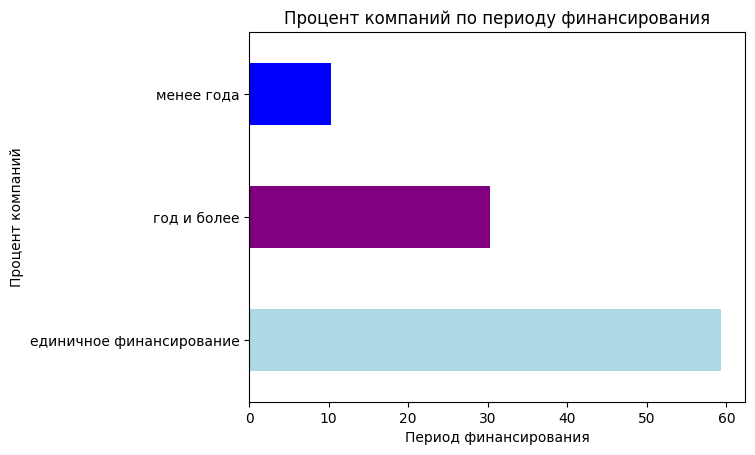

In [62]:
#Построим диаграмму, отражающую, какой процент компаний имел соответствующий период финансирования
color_dict = {
    'единичное финансирование': 'lightblue',
    'менее года': 'blue', 
    'год и более': 'purple'
}
(df['funding_period'].value_counts(normalize=True)*100).plot(
    kind='barh',
    title='Процент компаний по периоду финансирования',
    color=[color_dict[x] for x in (df['funding_period'].value_counts(normalize=True)*100).index],
    xlabel='Период финансирования',
    ylabel='Процент компаний'
)

In [63]:
df['funding_total_usd'].describe()

count    4.089700e+04
mean     1.591596e+07
std      1.686993e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [64]:
df['funding_period'].value_counts()

funding_period
единичное финансирование    24282
год и более                 12384
менее года                   4231
Name: count, dtype: int64

In [65]:
round(df['funding_period'].value_counts(normalize=True)*100,2)

funding_period
единичное финансирование    59.37
год и более                 30.28
менее года                  10.35
Name: proportion, dtype: float64

Около 59,38% компаний получили единичное финансирование, еще 10,35% финансировались в течение года, а 30,28% компаний получали финансирование год и более.

<AxesSubplot:title={'center':'Доля инвестиций по периоду финансирования'}, xlabel='Период финансирования', ylabel='Доля инвестиций'>

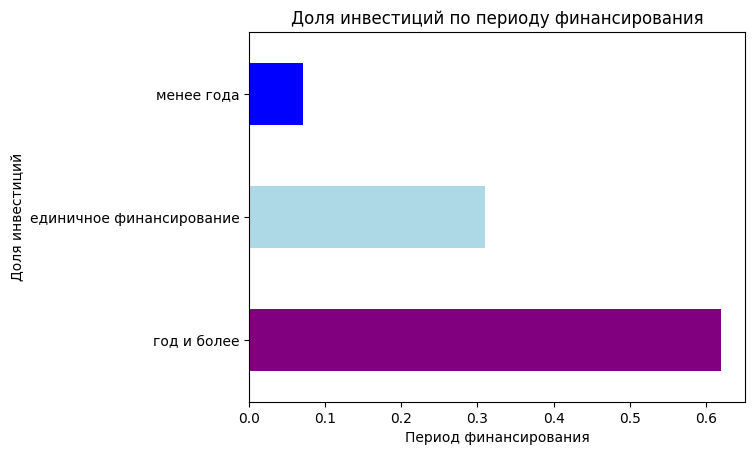

In [66]:
#Построим диаграмму, отражающую, какую долю от общего объёма привлечённых средств получила каждая группа
color_dict = {
    'единичное финансирование': 'lightblue',
    'менее года': 'blue', 
    'год и более': 'purple'
}
# Данные для графика
plot_data = df.groupby('funding_period')['funding_total_usd'].sum().div(df['funding_total_usd'].sum())

colors = [color_dict[category] for category in plot_data.index]

# Строим график
plot_data.plot(
    kind='barh',
    color=colors,
    title='Доля инвестиций по периоду финансирования',
    xlabel='Период финансирования',
    ylabel='Доля инвестиций'
)

In [67]:
df.groupby('funding_period')['funding_total_usd'].sum()

funding_period
год и более                 403750934700
единичное финансирование    201308721509
менее года                   45855325211
Name: funding_total_usd, dtype: int64

In [68]:
round(df.groupby('funding_period')['funding_total_usd'].sum().div(df['funding_total_usd'].sum())*100,2)

funding_period
год и более                 62.03
единичное финансирование    30.93
менее года                   7.04
Name: funding_total_usd, dtype: float64

По сумме инвестирования данные распределены следующим образом:

- На компании, получавших единичное финансирование, приходится около 31% всех инвестиций.

- На компании, получавших финансирование в течение года, приходится около 7% всех инвестиций.

- На компании, получавших финансирование год и более, приходится около 62% всех инвестиций.

### Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

In [69]:
market_segments=df['market'].value_counts()

# Рассчитываем частоту сегментов 
market_categories = df['market'].value_counts()

massive_categories = []
medium_categories = []
niche_categories = []

for category, count in market_segments.items():
    if count > 120:
        massive_categories.append(category)
    elif count >= 35:
        medium_categories.append(category)
    else:
        niche_categories.append(category)

print("Массовые сегменты:", massive_categories)
print("Средние сегменты:", medium_categories)
print("Нишевые сегменты:", niche_categories)


Массовые сегменты: ['software', 'biotechnology', 'unknown', 'mobile', 'e-commerce', 'curated web', 'enterprise software', 'health care', 'clean technology', 'games', 'advertising', 'hardware + software', 'social media', 'health and wellness', 'education', 'finance', 'analytics', 'manufacturing', 'security', 'semiconductors', 'web hosting', 'consulting', 'hospitality', 'travel', 'fashion', 'news', 'messaging', 'search', 'real estate', 'saas', 'music', 'internet', 'technology', 'apps', 'photography', 'sports', 'marketplaces', 'video', 'social network media', 'automotive', 'cloud computing', 'medical', 'entertainment', 'big data', 'networking', 'nonprofits', 'design', 'public relations', 'startups']
Средние сегменты: ['sales and marketing', 'financial services', 'medical devices', 'media', 'public transportation', 'transportation', 'retail', 'digital media', 'web development', 'nanotechnology', 'information technology', 'legal', 'enterprises', 'android', 'payments', 'consumer electronics'

Оставим в столбце `market` только массовые сегменты. Для остальных сегментов заменим значения на заглушки — `niche` для нишевых и `mid` для средних.

<AxesSubplot:title={'center':'Количество компаний в сегментах'}, xlabel='Сегменты', ylabel='Количество компаний'>

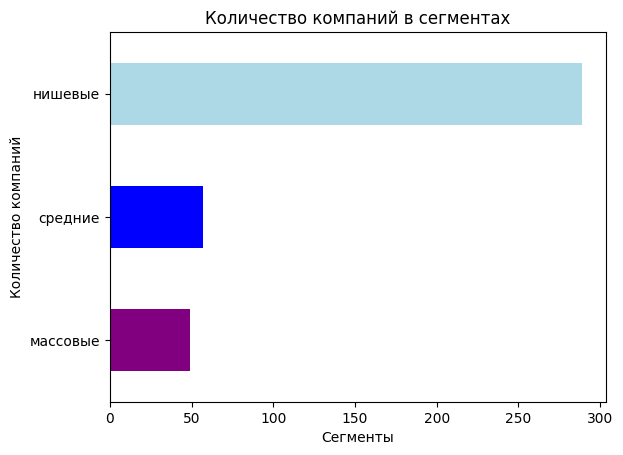

In [70]:
segment_color_dict = {
    'массовый': 'purple',
    'средний': 'blue',
    'нишевой': 'lightblue'    
}

market_segments=pd.Series({
    'массовые':len(massive_categories),
    'средние': len(medium_categories),
    'нишевые':len(niche_categories)

})
colors = [segment_color_dict['массовый'], segment_color_dict['средний'], segment_color_dict['нишевой']]

market_segments.plot(
    kind='barh',
    color=colors,
    title='Количество компаний в сегментах',
    xlabel='Сегменты',
    ylabel='Количество компаний'
    )

In [71]:
#Заменим категории рынка для нишевого и среднего сегментов
for category in df['market']:
    if category in medium_categories:
        df['market']=df['market'].replace(category,'mid')
    elif category in niche_categories:
        df['market']=df['market'].replace(category,'niche')
    else:
        pass 
df['market']

0        education
1          unknown
2              mid
3        education
4        education
           ...    
40902      unknown
40903        niche
40904      unknown
40905      unknown
40906     startups
Name: market, Length: 40897, dtype: object

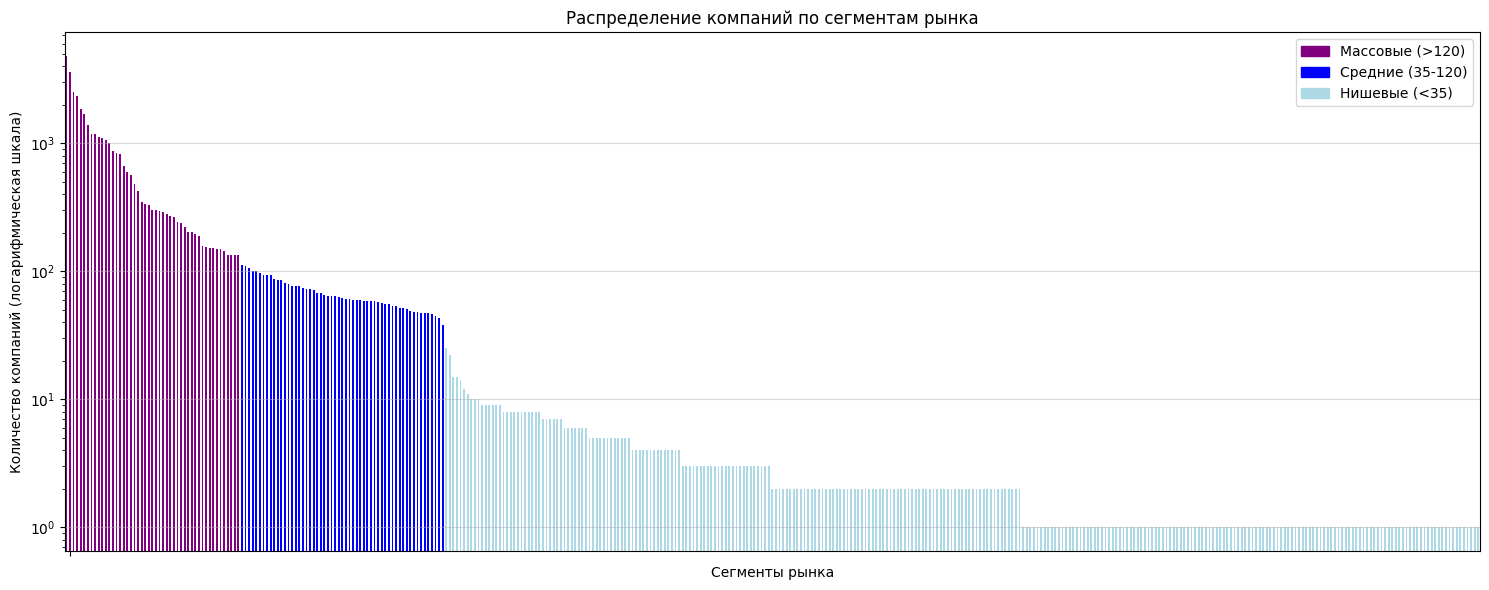

In [72]:
plt.figure(figsize=(15, 6))

colors = [
    'purple' if count > 120 else 
    'blue' if count >= 35 else 
    'lightblue' 
    for count in market_categories.values
]

market_categories.plot(
    kind='bar',
    color=colors
)

plt.yscale('log')
plt.title('Распределение компаний по сегментам рынка')
plt.xlabel('Сегменты рынка')
plt.ylabel('Количество компаний (логарифмическая шкала)')
plt.xticks(ticks=[1], labels='')
plt.grid(axis='y', alpha=0.5)

legend_elements = [
    Patch(color='purple', label='Массовые (>120)'),
    Patch(color='blue', label='Средние (35-120)'),
    Patch(color='lightblue', label='Нишевые (<35)')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

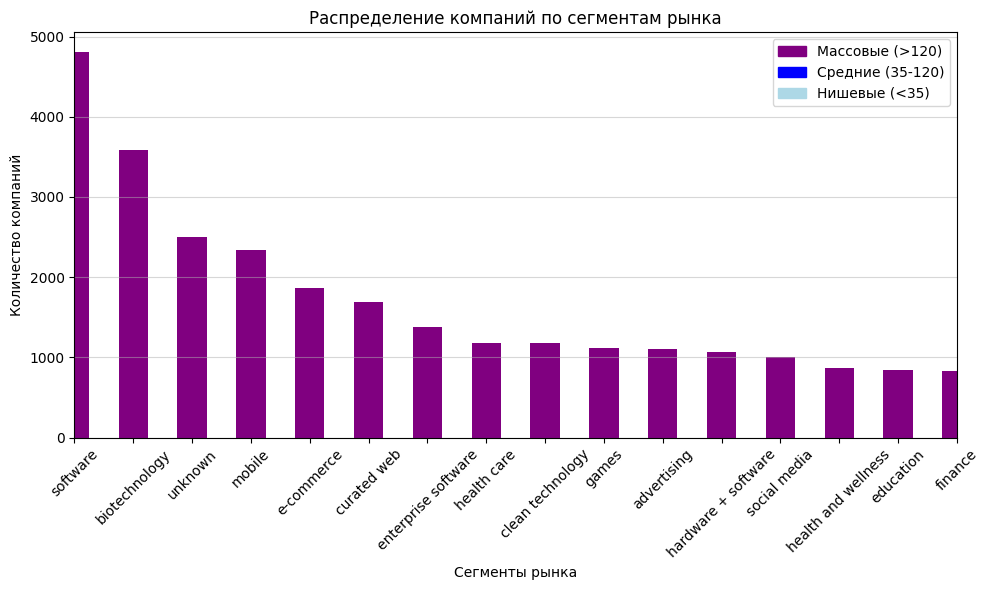

In [73]:
#Ограничим масштаб, чтобы можно было увидеть начало графика, содержащие сегменты рынка, 
# к которым относятся больше всего компаний. Шкалу можно использовать обычную.
plt.figure(figsize=(10, 6))

colors = [
    'purple' if count > 120 else 
    'blue' if count >= 35 else 
    'lightblue' 
    for count in market_categories.values
]

market_categories.plot(
    kind='bar',
    color=colors,
    rot=45
)

# plt.yscale('log')
plt.title('Распределение компаний по сегментам рынка')
plt.xlabel('Сегменты рынка')
plt.ylabel('Количество компаний')
#plt.xticks(ticks=[1], labels='')
plt.grid(axis='y', alpha=0.5)
plt.xlim(0,15)

legend_elements = [
    Patch(color='purple', label='Массовые (>120)'),
    Patch(color='blue', label='Средние (35-120)'),
    Patch(color='lightblue', label='Нишевые (<35)')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [74]:
market_categories.head(15)

market
software               4812
biotechnology          3590
unknown                2500
mobile                 2343
e-commerce             1866
curated web            1691
enterprise software    1381
health care            1185
clean technology       1180
games                  1117
advertising            1107
hardware + software    1062
social media           1003
health and wellness     872
education               844
Name: count, dtype: int64

В топ-е по числу компаний (в массовых сегментах) - такие, как 'software', 'biotechnology','mobile', 'e-commerce', 'curated web', 'enterprise software', 'health care' - связанные или с информационными технологиями, или со здравоохранением и биотехнологиями. 

Большинство сегментов являются нишевыми, в т.ч. примерно в трети сегментов присутствует по одной компании. Данная картина распределения компаний по сегментам указывает на высокую специализацию рынка - компании находят узкие ниши для сокращения конкуренции, а также на инновационный характер стартапов, которые создают новые рыночные категории.
На рынке стартапов присутствует большое количество "мелких" игроков, занимающих свою продуктовую нишу.  

In [75]:
f'По графику мы можем увидеть к первым 15 массовым сегментам рынка относится {round(market_categories.head(15).sum()/len(df)*100)}% всех компаний'

'По графику мы можем увидеть к первым 15 массовым сегментам рынка относится 65% всех компаний'

## Работа с выбросами и анализ

### Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

([<matplotlib.axis.YTick at 0x176f0614be0>], [Text(0, 1, '')])

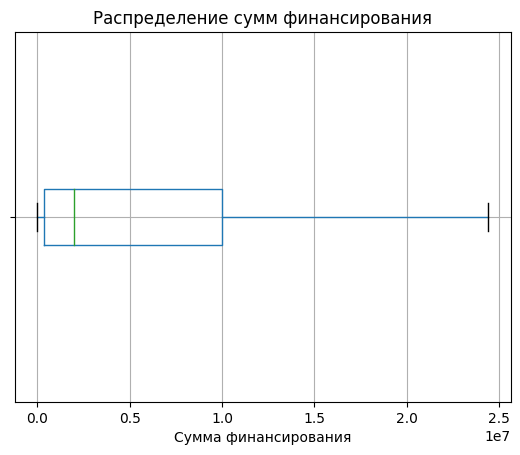

In [76]:
#Построим диаграмму размаха по столбцу funding_total_usd для определения типичного объема финансирования
df.boxplot(
    column='funding_total_usd',
    vert=False,
    showfliers=False
)
plt.title('Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.yticks(ticks=[1], labels='')

In [77]:
df['funding_total_usd'].describe()

count    4.089700e+04
mean     1.591596e+07
std      1.686993e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

Проанализировав диаграмму размаха и основные статистические показатели по столбцу `funding_total_usd`, можем сделать вывод, что наиболее типичным объемом финансирования (медиана) является 2.000000e+6 USD (или 2 000 000), а выбросами можно считать значения выше ~2.5е+7 (или 25 000 000) USD. Типичные значения лежат в диапазоне от 3.5е+5 (350 000) USD до 1е+7 (10 000 000) USD - это межквартильный диапазон - центральные 50% данных. 

Для оценки финансирования по сегментам рынка построим диаграммы размаха по каждому из них.

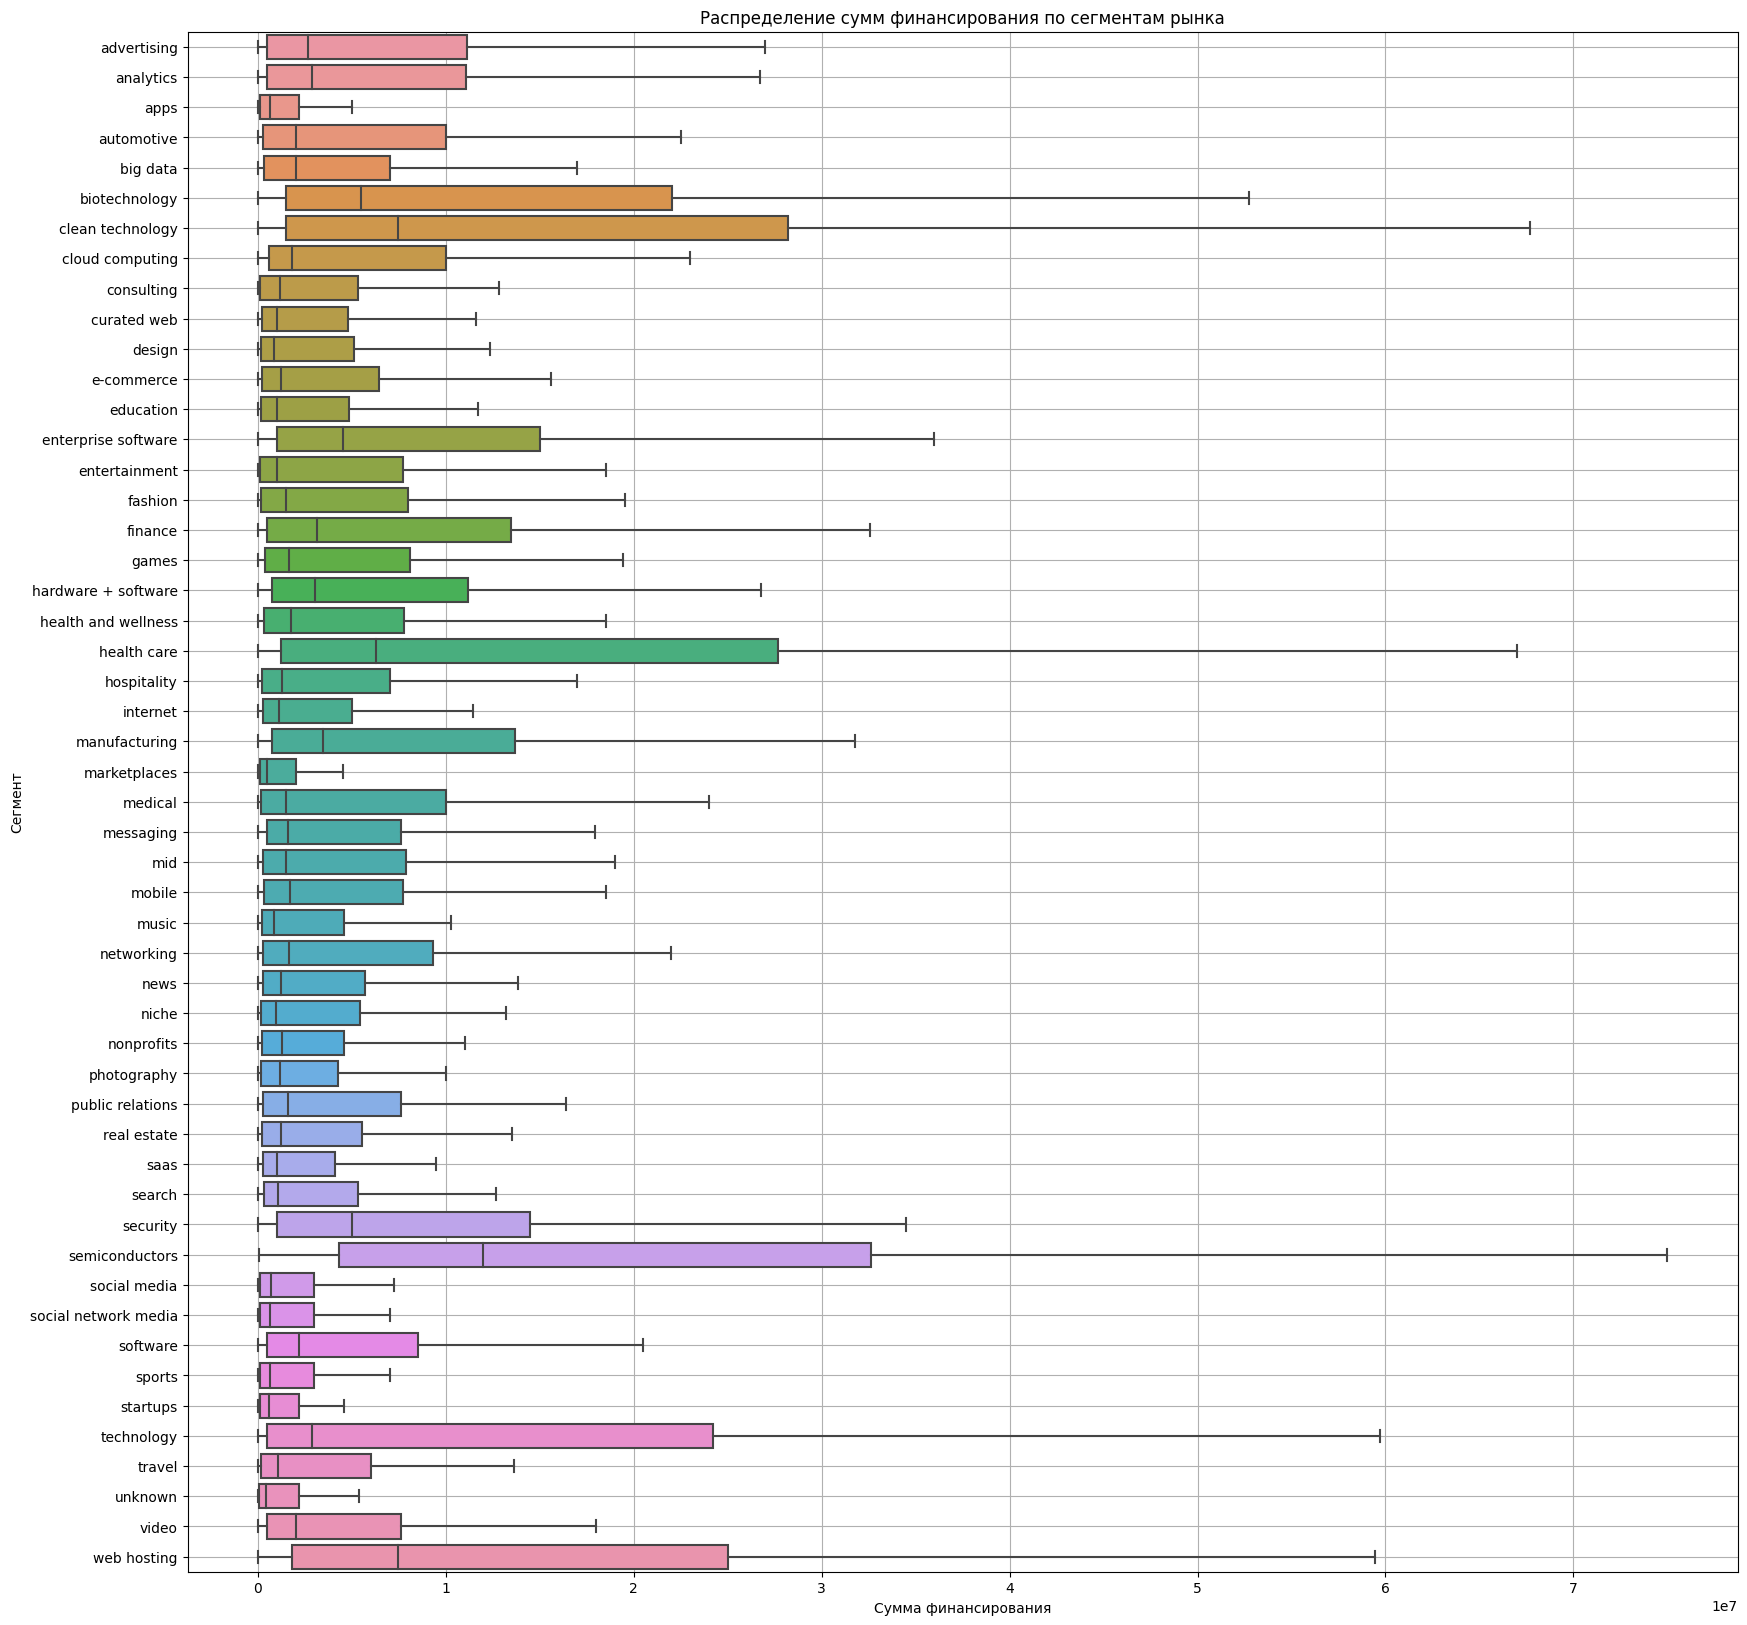

In [78]:
plt.figure(figsize=(20, 20))

sns.boxplot(
    x='funding_total_usd', 
    y='market',
    data=df,
    showfliers=False,
    order=sorted(df['market'].unique())
    )
plt.xlabel('Сумма финансирования')
plt.ylabel('Сегмент')
plt.title('Распределение сумм финансирования по сегментам рынка')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show() 

Найдем аномальные значения о финансировании компаний для каждого сегмента рынка.

In [79]:
total_outliers = 0
lower_bounds = []
upper_bounds = []
segments = []
outliers_counts = []
total_counts_list = []
outliers_indices = []

for segment in df['market'].unique():
    segment_data = df[df['market'] == segment]
    
    if len(segment_data) == 0:
        continue
        
    # Вычисляем квартили и IQR
    Q1 = segment_data['funding_total_usd'].quantile(0.25)
    Q3 = segment_data['funding_total_usd'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Определяем границы для выбросов
    lower_bound = max(0, Q1 - 1.5 * IQR) 
    upper_bound = Q3 + 1.5 * IQR
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)
    segments.append(segment)

    # Находим выбросы
    outliers = segment_data[
        #(segment_data['funding_total_usd'] < lower_bound) | - можно удалить, не влияет на результат
        (segment_data['funding_total_usd'] > upper_bound)
    ]
    outliers_count = len(outliers)
    total_outliers += outliers_count
    outliers_counts.append(outliers_count)
    
    # Общее количество компаний в сегменте
    total_count_segment = len(segment_data)
    total_counts_list.append(total_count_segment)

    # Собираем индексы выбросов из этого сегмента - понадобится в следующей задаче
    outliers_indices.extend(outliers.index.tolist())



In [80]:
#Определяем долю компаний-выбросов по каждому сегменту
outliers_shares = [outlier_count / total_count for outlier_count, total_count in zip(outliers_counts, total_counts_list)]

outliers_df = pd.DataFrame({
    'segment': segments,
    'lower_bound': lower_bounds,
    'upper_bound': upper_bounds,
    'outliers_count': outliers_counts,
    'outliers_share': outliers_shares
})
#Выделим топ-5 по доле компаний в сегменте, получивших "аномальное" финансирование
top_5_outliers_segments=outliers_df.sort_values(by='outliers_share', ascending=False).head()
top_5_outliers_segments

,segment,lower_bound,upper_bound,outliers_count,outliers_share
30,real estate,0,13511430.75,48,0.172043
44,entertainment,0,19128091.25,25,0.166667
29,consulting,0,13137500.00,58,0.166189
40,search,0,12850000.00,48,0.164948
46,cloud computing,0,24122042.50,25,0.164474


### Определяем границы рассматриваемого периода, отбрасываем аномалии


In [81]:
#Делаем фильтрацию по году финансирования
data_2014=df[(df['first_funding_at']>='2014-01-01')&(df['last_funding_at']<='2014-12-31')]

print(f"Размер исходного датасета: {len(df)}")
print(f"Размер очищенного датасета: {len(data_2014)}")

Размер исходного датасета: 40897
Размер очищенного датасета: 6472


In [82]:
#Выведем строки, для которых сумма по источникам не совпадает с суммарным финансированием
data_2014[(data_2014['sum_sources_delta']!=0)]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources,investment_sum_rounds,sum_sources_delta,sum_rounds_delta,funding_period


Таких строк нет.

In [83]:
#Выведем строки, для которых сумма по раундам не совпадает с суммарным финансированием
round(len(data_2014[data_2014['sum_rounds_delta']!=0])/len(data_2014)*100,2)

88.33

В ~88% строк сумма по источникам не совпадает с суммой по раундам, что указывает на неполные данные по раундам финансирования. В последующей задаче мы будем считать сумму за раунд - как среднее.

In [84]:
# Рассчитаем квартили и IQR для сумм инвестирования в 2014 году для исключения аномальных значений.
Q1 = data_2014['funding_total_usd'].quantile(0.25)
Q3 = data_2014['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_2014_cleaned = data_2014[(data_2014['funding_total_usd'] >= lower_bound) & 
                         (data_2014['funding_total_usd'] <= upper_bound)]
data_2014_cleaned.describe()

,funding_total_usd,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,investment_sum_sources,investment_sum_rounds,sum_sources_delta,sum_rounds_delta
count,5.546000e+03,5546.000000,154.000000,4008,3997,3997,4008.000000,5546,5546,5546,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5.546000e+03,5546.0,5546.0,5546.0,5546.0,5.546000e+03,5.546000e+03,5546.0,5.546000e+03
mean,1.378269e+06,1.110350,0.922078,2010-07-02 11:35:34.131736576,2010-11-29 03:33:38.413810176,2010-11-13 16:04:26.599949824,2010.275449,2014-05-28 09:04:13.155427328,2014-06-03 07:53:04.565452544,2014-06-09 07:47:37.410746624,3.088245e+05,8.023146e+05,2.689124e+04,2.614758e+04,1.187150e+04,6.145767e+04,3.530217e+04,5.304941e+04,1.162452e+04,2.478226e+04,5.107888e+03,8.757535e+02,1.001949e+04,2.955742e+05,3.436707e+04,7.655498e+03,2.979264e+03,0.0,0.0,0.0,0.0,1.378269e+06,3.405760e+05,0.0,1.037693e+06
min,1.000000e+00,1.000000,0.000000,1785-01-01 00:00:00,1905-01-01 00:00:00,1905-01-01 00:00:00,1785.000000,2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,1.000000e+05,1.000000,0.000000,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011.000000,2014-03-03 00:00:00,2014-03-17 00:00:00,2014-03-19 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.000000e+05,0.000000e+00,0.0,4.800000e+04
50%,5.316750e+05,1.000000,0.000000,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013.000000,2014-05-30 00:00:00,2014-06-03 00:00:00,2014-06-12 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.316750e+05,0.000000e+00,0.0,3.300000e+05
75%,2.000000e+06,1.000000,1.000000,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-10-01 00:00:00,2013.000000,2014-08-14 00:00:00,2014-08-18 00:00:00,2014-08-28 00:00:00,1.667070e+05,5.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2.000000e+06,0.000000e+00,0.0,1.323919e+06
max,8.600000e+06,4.000000,9.000000,2014-12-13 00:00:00,2014-12-01 00:00:00,2014-10-01 00:00:00,2014.000000,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,7.500000e+06,8.600000e+06,7.200000e+06,8.000000e+06,5.000000e+06,8.000000e+06,5.650000e+06,8.500000e+06,8.000000e+06,8.500000e+06,7.498349e+06,4.700000e+06,7.216365e+06,8.500000e+06,8.600000e+06,7.557394e+06,6.000000e+06,0.0,0.0,0.0,0.0,8.600000e+06,8.600000e+06,0.0,8.500000e+06
std,1.847410e+06,0.352875,1.975446,NaN,NaN,NaN,10.971864,NaN,NaN,NaN,7.427324e+05,1.731069e+06,2.745520e+05,2.928737e+05,1.574510e+05,4.547649e+05,2.495281e+05,4.758286e+05,2.197273e+05,3.518167e+05,1.627455e+05,6.314621e+04,1.674964e+05,1.157686e+06,4.127549e+05,2.127818e+05,1.222412e+05,0.0,0.0,0.0,0.0,1.847410e+06,1.245341e+06,0.0,1.580140e+06


In [85]:
months={}
for column in {'first_funding_at','mid_funding_at',	'last_funding_at'}:
    months[column]=data_2014_cleaned[column].dt.month
months_df = pd.DataFrame(months)
months_df

,mid_funding_at,first_funding_at,last_funding_at
1,5,5,5
4,1,1,1
8,9,9,9
14,5,5,5
16,7,7,7
...,...,...,...
40900,12,12,12
40901,12,12,12
40902,12,12,12
40904,12,12,12


In [86]:
first_counts = months_df['first_funding_at'].value_counts().sort_index()
mid_counts = months_df['mid_funding_at'].value_counts().sort_index()
last_counts = months_df['last_funding_at'].value_counts().sort_index()

monthly_counts = pd.DataFrame({
    'first_funding_at': first_counts,
    'mid_funding_at': mid_counts,
    'last_funding_at': last_counts
})

print(monthly_counts)

    first_funding_at  mid_funding_at  last_funding_at
1                708             588              584
2                550             481              471
3                544             521              493
4                496             522              467
5                481             513              463
6                580             645              592
7                593             623              618
8                456             491              499
9                450             463              523
10               416             424              500
11               257             260              314
12                15              15               22


<AxesSubplot:title={'center':'Количество финансирований по месяцам 2014 года'}, xlabel='Месяц', ylabel='Количество'>

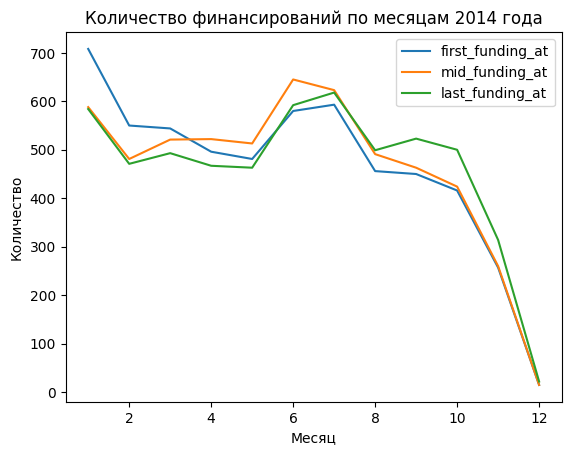

In [87]:
monthly_counts.plot(
    kind='line',
    title='Количество финансирований по месяцам 2014 года', 
    xlabel='Месяц', 
    ylabel='Количество'
)

По графику наблюдается сильное падение количества данных о финансировании в конце 2014 года (за ноябрь и декабрь) - это может указывать на неполноту предоставленных для анализа данных

In [88]:
df_cleaned = df.drop(index=outliers_indices)

In [89]:
# Создадим столбец 'year' из даты mid_funding_at
df_cleaned['year'] = df_cleaned['mid_funding_at'].dt.year

rounds_per_year = df_cleaned['year'].value_counts()
active_years = rounds_per_year[rounds_per_year >= 50].index
final_data = df_cleaned[df_cleaned['year'].isin(active_years)]
final_data=final_data.reset_index()
final_data = final_data.drop('index', axis=1)

In [90]:
f'Годы, когда было зафиксировано 50 или более раундов финансирования:{active_years.sort_values().tolist()}'

'Годы, когда было зафиксировано 50 или более раундов финансирования:[2000, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]'

### Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

[Text(0, 0, 'seed'),
 Text(1, 0, 'venture'),
 Text(2, 0, 'equity_crowdfunding'),
 Text(3, 0, 'undisclosed'),
 Text(4, 0, 'convertible_note'),
 Text(5, 0, 'debt_financing'),
 Text(6, 0, 'angel'),
 Text(7, 0, 'grant'),
 Text(8, 0, 'private_equity'),
 Text(9, 0, 'post_ipo_equity'),
 Text(10, 0, 'post_ipo_debt'),
 Text(11, 0, 'secondary_market'),
 Text(12, 0, 'product_crowdfunding')]

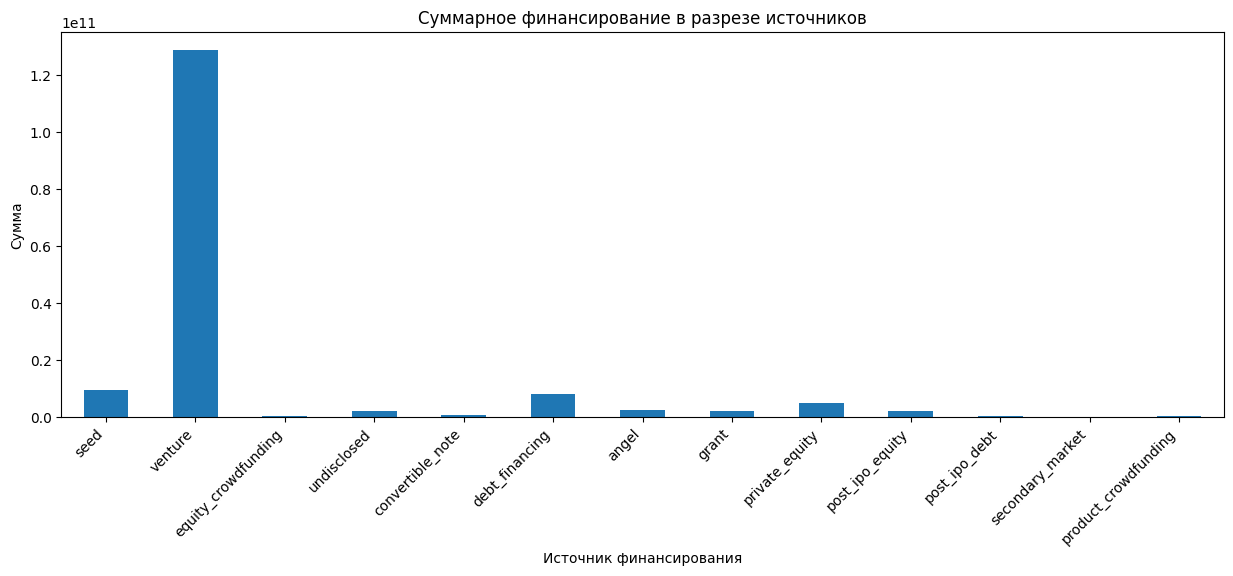

In [91]:
finance_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                   'convertible_note', 'debt_financing', 'angel', 'grant', 
                   'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                   'secondary_market', 'product_crowdfunding']
amount_by_type=final_data[finance_columns].sum().plot(
    kind='bar',
    title='Суммарное финансирование в разрезе источников',
    xlabel='Источник финансирования',
    ylabel='Сумма',
    rot=45,
    figsize=(15,5)
)
amount_by_type.set_xticklabels(amount_by_type.get_xticklabels(), rotation=45, ha='right')

In [92]:
amount_by_type=final_data[finance_columns].sum().sort_values(ascending=False)
amount_by_type

venture                 128849480867
seed                      9421143177
debt_financing            8176252734
private_equity            4835608504
angel                     2477019864
undisclosed               2022469669
grant                     1978405574
post_ipo_equity           1946152068
convertible_note           566039436
post_ipo_debt              286718349
equity_crowdfunding        237960645
product_crowdfunding       186093920
secondary_market            45285796
dtype: int64

Самые крупные по сумме - это венчурные инвестиции, долговое финансирование и от частных вложений.

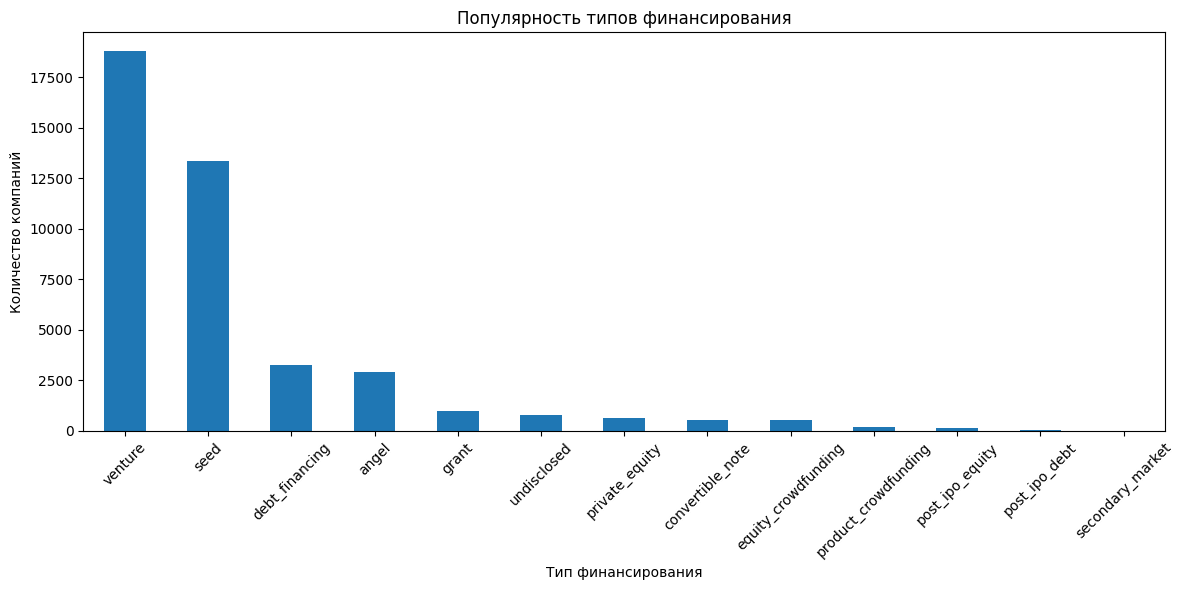

In [93]:
# Считаем для каждого типа финансирования сколько компаний его использовали
count_by_type = (final_data[finance_columns] > 0).sum().sort_values(ascending=False)

count_by_type.plot(
    kind='bar',
    title='Популярность типов финансирования',
    xlabel='Тип финансирования',
    ylabel='Количество компаний',
    figsize=(12, 6),
    rot=45
)
plt.tight_layout()
plt.show()

In [94]:
count_by_type

venture                 18774
seed                    13363
debt_financing           3264
angel                    2932
grant                    1000
undisclosed               804
private_equity            633
convertible_note          521
equity_crowdfunding       515
product_crowdfunding      204
post_ipo_equity           163
post_ipo_debt              27
secondary_market            7
dtype: int64

Самый частый источник финансирования - венчурные инвестиции, на втором месте посевные. 

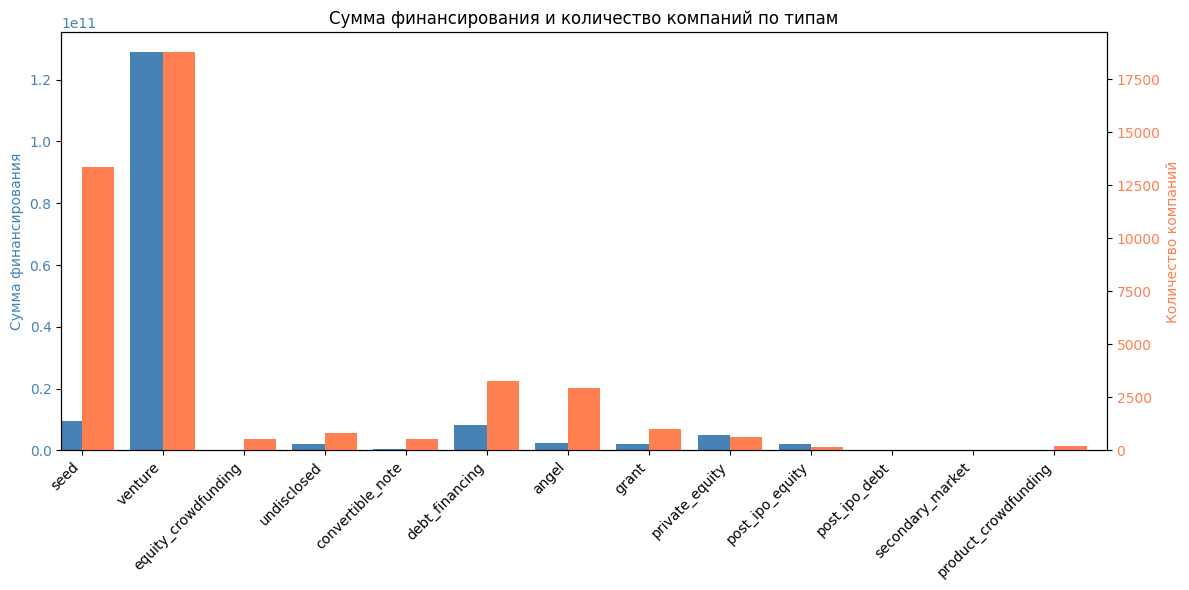

In [95]:
plot_data=pd.DataFrame()
plot_data['sum']=final_data[finance_columns].sum()
plot_data['count']=(final_data[finance_columns] > 0).sum()


fig, ax1 = plt.subplots(figsize=(12, 6))

plot_data['sum'].plot(
    kind='bar', 
    ax=ax1, 
    position=1, 
    width=0.4,
    color='steelblue')
ax1.set_ylabel('Сумма финансирования', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(plot_data.index, rotation=45, ha='right')

ax2 = ax1.twinx()
plot_data['count'].plot(kind='bar', color='coral', ax=ax2, position=0, width=0.4)
ax2.set_ylabel('Количество компаний', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.title('Сумма финансирования и количество компаний по типам')
plt.tight_layout()
plt.show()

In [96]:
#Создадим датафрейм для построения диаграммы рассеяния
scatter_data = pd.DataFrame({
    'amount_by_type': amount_by_type,
    'сount_by_type': count_by_type,
    'avg_funding': amount_by_type / count_by_type
})
scatter_data.sort_values(by='avg_funding',ascending=False)

,amount_by_type,сount_by_type,avg_funding
post_ipo_equity,1946152068,163,1.193958e+07
post_ipo_debt,286718349,27,1.061920e+07
private_equity,4835608504,633,7.639192e+06
venture,128849480867,18774,6.863187e+06
secondary_market,45285796,7,6.469399e+06
undisclosed,2022469669,804,2.515510e+06
debt_financing,8176252734,3264,2.504979e+06
grant,1978405574,1000,1.978406e+06
convertible_note,566039436,521,1.086448e+06
product_crowdfunding,186093920,204,9.122251e+05


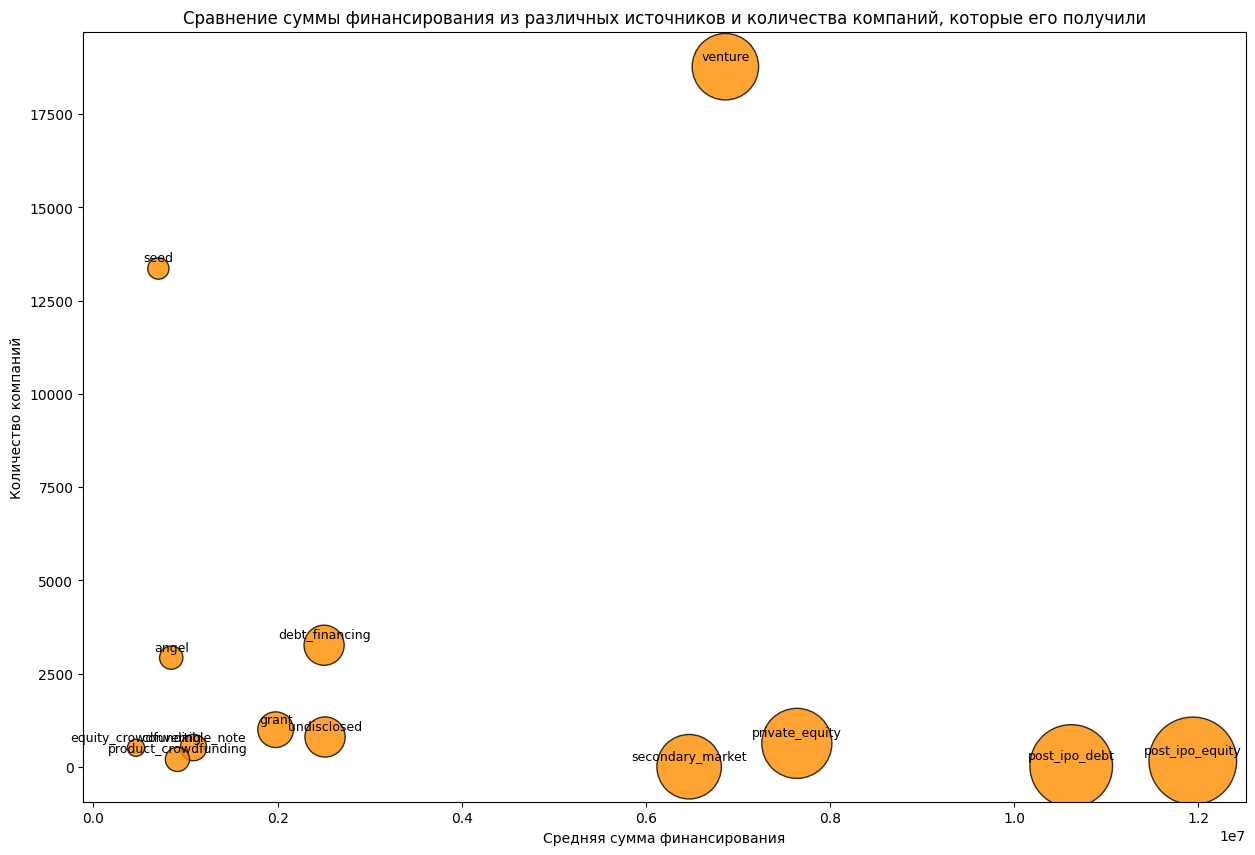

In [97]:
scatter_data.plot(
    kind='scatter',
    x='avg_funding',
    y='сount_by_type',
    figsize=(15, 10),   
    s=scatter_data['avg_funding']/3000,  # Используем количество примеров для размера точек
    color='darkorange',   
    edgecolor='black',  
    alpha=0.8,        
    title='Сравнение суммы финансирования из различных источников и количества компаний, которые его получили',
    xlabel='Средняя сумма финансирования',
    ylabel='Количество компаний'
)
for i, (idx, row) in enumerate(scatter_data.iterrows()):
    plt.text(
        row['avg_funding'],           
        row['сount_by_type'] + 100,   
        idx,                          
        ha='center',                  
        va='bottom',                  
        fontsize=9
    )

На графике можно выделить, что инвестиции на посевной стадии характеризуются небольшими объемами, но встречаются часто, а суммы финансирования и долгового финансирования после IPO встречаются редко, но характеризуются значительным объёмом предоставленных сумм. При этом венчурные инвестиции встречаются часто и имеют средне-большие объемы

<AxesSubplot:title={'center':'Суммы возвратов от разных типов финансирования'}, xlabel='Источник финансирования', ylabel='Сумма возврата, млн.долл'>

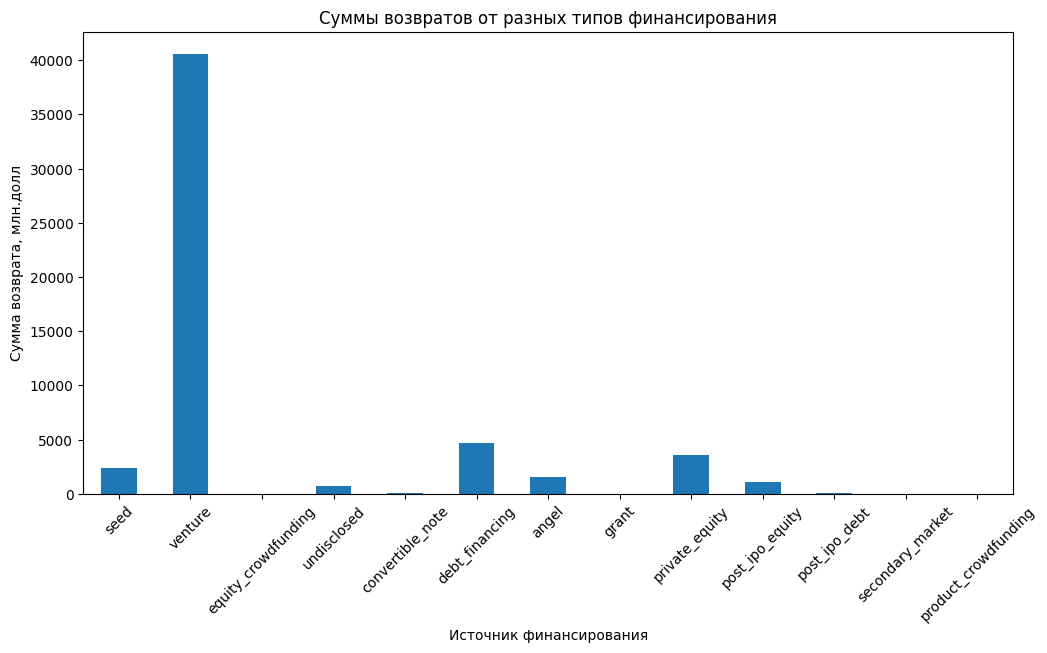

In [98]:
returns_df.sum().plot(
    kind='bar',
    title='Суммы возвратов от разных типов финансирования',
    xlabel='Источник финансирования',
    ylabel='Сумма возврата, млн.долл',
    rot=45,
    figsize=(12,6)
)


In [99]:
returns_df.sum().sort_values(ascending=False)

venture                 40578.62
debt_financing           4734.85
private_equity           3587.33
seed                     2382.24
angel                    1509.23
post_ipo_equity          1104.96
undisclosed               730.88
post_ipo_debt              91.03
convertible_note           34.79
secondary_market            5.20
equity_crowdfunding         3.83
product_crowdfunding        1.86
grant                       0.00
dtype: float64

Максимальная сумма возвратов - по венчурным инвестициям. 

Можно обратить внимание, что сумма возвратов по грантам равна нулю. Это связано с определением понятия грант - это безвозмездная финансовая поддержка на определенные цели, которая не требует возврата, если все условия договора выполнены. Невозврат средств происходит благодаря выполнению целевого использования и обязательной отчетности по расходованию. 

### Предварительные выводы:
- Типичные значения объема финансирования составляют от 350 тыс USD до 25 млн USD, а наиболее типичным является 2 млн USD
- Сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование: 'real estate', 'entertainment', 'consulting', 'search', 'cloud computing', процент таких компаний в них около 16-17%
- Тип финансирования, по которому привлечено больше всего денег - венчурное, по нему же самое высокая популярность (высокое количество компаний, которые его получили), а также значение возврата финансирования. 
- Финансирование на посевном этапе происходит часто, но в небольших объемах, в то время как после IPO фактов финансирования немного, но на очень большие суммы. 


## Анализ динамики

### Динамика предоставления финансирования по годам


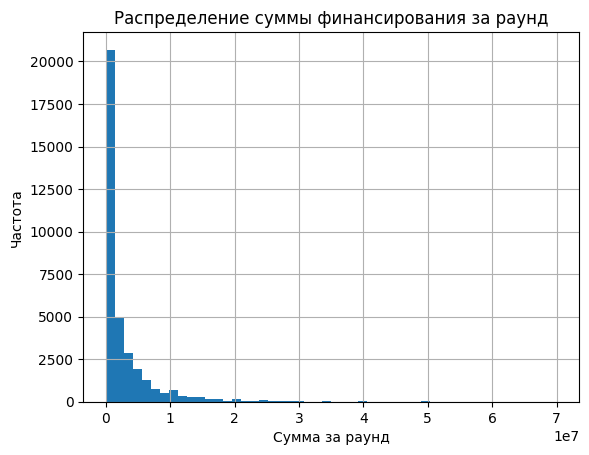

In [100]:
final_data['sum_per_round']=final_data['funding_total_usd']/final_data['funding_rounds']
final_data['sum_per_round'] = final_data['funding_total_usd'] / final_data['funding_rounds']

final_data['sum_per_round'].hist(bins=50)

plt.xlabel('Сумма за раунд')
plt.ylabel('Частота')
plt.title('Распределение суммы финансирования за раунд')

plt.show()


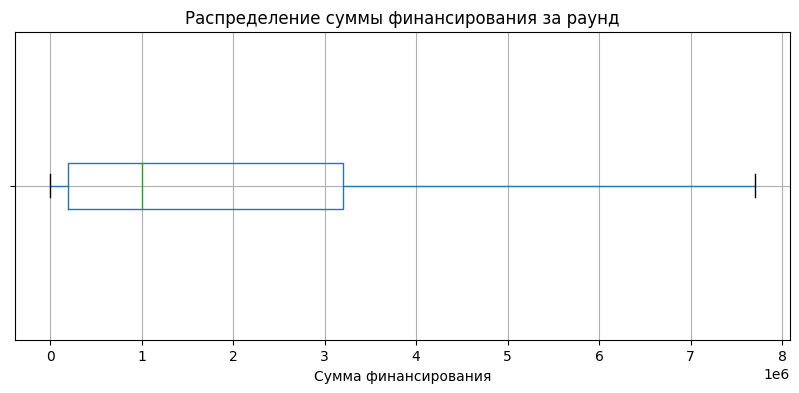

In [101]:
ax = final_data.boxplot(
    column=['sum_per_round'],
    showfliers=False,
    vert=False,
    figsize=(10,4)
)

ax.set_title('Распределение суммы финансирования за раунд')
plt.xlabel('Сумма финансирования')
plt.yticks(ticks=[1], labels='')
plt.show()

In [102]:
final_data['sum_per_round'].describe()

count    3.551600e+04
mean     2.785655e+06
std      4.976394e+06
min      1.000000e+00
25%      2.000000e+05
50%      1.000000e+06
75%      3.200000e+06
max      7.000000e+07
Name: sum_per_round, dtype: float64

Типичный размера средств, которые стартапы получали в рамках одного раунда финансирования, - от 2e+5 (или 200 000 USD) до 3,2е+6 (или 3 200 000 USD), наиболее типичное значение 1е+6 (или 1 000 000 USD).


<AxesSubplot:title={'center':'Динамика активности инвестирования (количества раундов) по годам'}, xlabel='Год', ylabel='Суммарное количество раундов'>

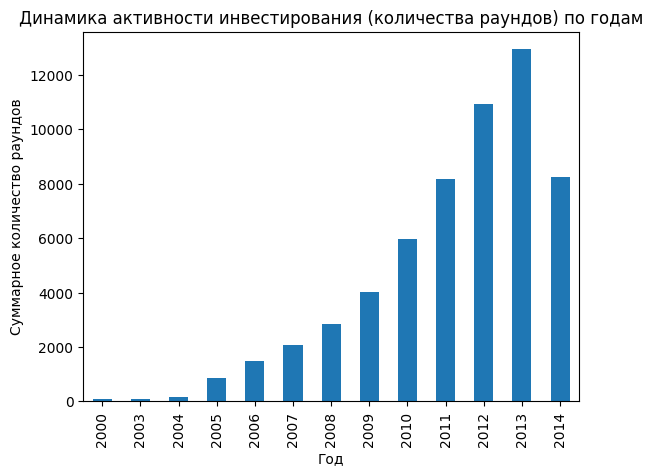

In [103]:
investment_activity=final_data.groupby('year')['funding_rounds'].sum()
investment_activity.plot(
    kind='bar',
    title='Динамика активности инвестирования (количества раундов) по годам',
    xlabel='Год',
    ylabel='Суммарное количество раундов'
)


In [104]:
final_data.groupby('year')['funding_rounds'].sum()

year
2000       75
2003       90
2004      167
2005      850
2006     1495
2007     2062
2008     2856
2009     4008
2010     5956
2011     8176
2012    10914
2013    12926
2014     8240
Name: funding_rounds, dtype: int64

На графике можем наблюдать рост активности инвестирования от 2000 года к 2013, а затем спад в 2014 году.

In [105]:
round((1-final_data[final_data['year']==2014]['funding_rounds'].sum()/final_data[final_data['year']==2013]['funding_rounds'].sum())*100,2)

36.25

Спад активности в 2014 по сравнению с 2013 годом составил около 36%

<AxesSubplot:title={'center':'Типичная сумма инвестирования за раунд по годам'}, xlabel='Год', ylabel='Сумма'>

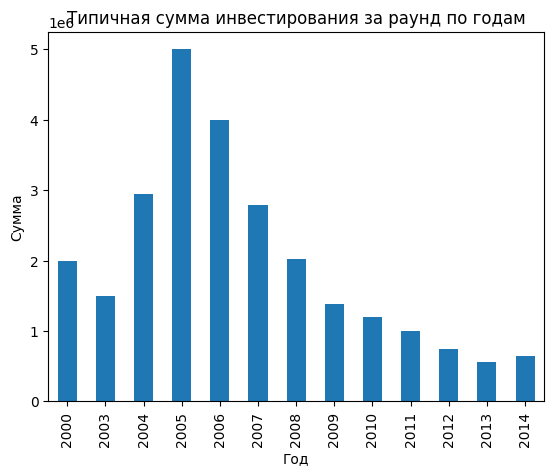

In [106]:
typical_sum_per_round=final_data.groupby('year')['sum_per_round'].median()
typical_sum_per_round.plot(
    kind='bar',
    title='Типичная сумма инвестирования за раунд по годам',
    xlabel='Год',
    ylabel='Сумма'
)

In [107]:
final_data.groupby('year')['sum_per_round'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,54.0,4.643060e+06,7.035703e+06,1000.0,8.597918e+05,2.000000e+06,6.875000e+06,44500000.0
2003,52.0,3.343701e+06,4.053591e+06,5000.0,5.750000e+05,1.505000e+06,5.093604e+06,18000000.0
2004,94.0,4.869402e+06,6.418542e+06,10000.0,1.155833e+06,2.950000e+06,6.875000e+06,52065215.0
2005,679.0,6.049602e+06,6.002727e+06,1000.0,1.797451e+06,5.000000e+06,8.470000e+06,54000000.0
2006,1070.0,5.736177e+06,6.146873e+06,5000.0,1.252500e+06,4.000000e+06,7.787500e+06,52000000.0
2007,1340.0,4.651446e+06,6.212285e+06,1875.0,7.990000e+05,2.791667e+06,6.394167e+06,65000000.0
2008,1726.0,4.302644e+06,6.647518e+06,1000.0,5.941548e+05,2.025604e+06,5.055435e+06,56130000.0
2009,2496.0,3.386760e+06,5.357935e+06,1265.0,3.684975e+05,1.384943e+06,4.105000e+06,60000000.0
2010,3423.0,3.172142e+06,5.457943e+06,291.0,2.983440e+05,1.200000e+06,3.732067e+06,67700000.0


По графику видим, что типичная сумма инвестирования за раунд была максимальна в 2005 году - около 6е+6 (или 6 000 000). 

В 2014 году можно отметить пониженную активность инвестирования - примерно на уровне 2011 года, типичная сумма финансирования немного выше, чем для 2013 года. 

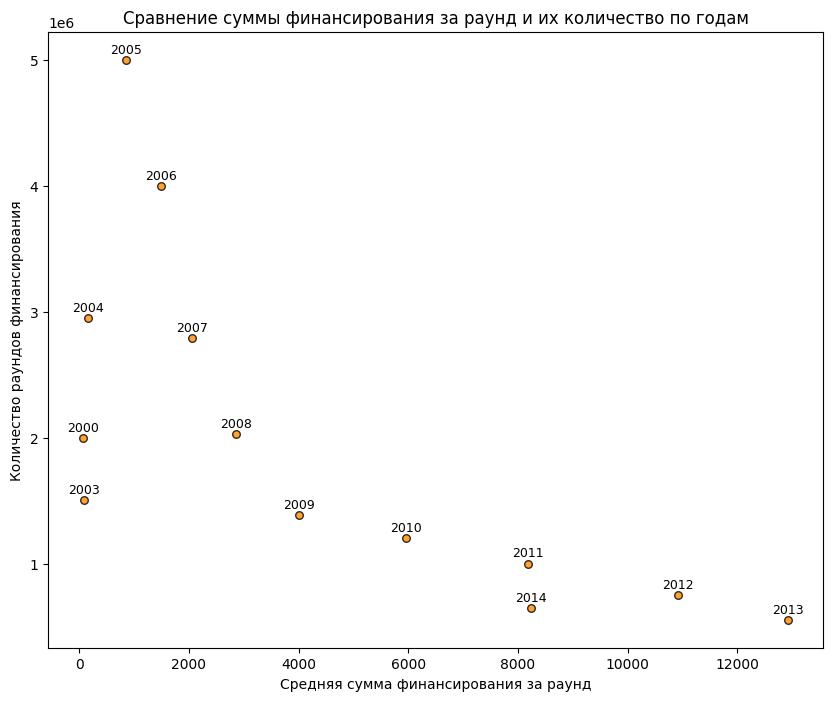

In [108]:
scatter_data = pd.DataFrame({
    'investment_activity': investment_activity,
    'typical_sum_per_round': typical_sum_per_round
})
scatter_data.plot(
    kind='scatter',
    x='investment_activity',
    y='typical_sum_per_round',
    figsize=(10, 8),   
    s=30,            
    color='darkorange',   
    edgecolor='black',  
    alpha=0.8,        
    title='Сравнение суммы финансирования за раунд и их количество по годам',
    xlabel='Средняя сумма финансирования за раунд',
    ylabel='Количество раундов финансирования'
)
for i, (idx, row) in enumerate(scatter_data.iterrows()):
    plt.text(
        row['investment_activity'],           
        row['typical_sum_per_round'] + 30000,   
        idx,                          
        ha='center',                  
        va='bottom',                  
        fontsize=9
    )

In [109]:
final_data.groupby('year')['funding_total_usd'].sum()

year
2000      356208254
2003      317825429
2004      807682256
2005     4926080234
2006     8583129181
2007     9650994203
2008    12195148272
2009    14129805046
2010    19142978004
2011    22502768634
2012    25732004487
2013    25053924824
2014    17630081779
Name: funding_total_usd, dtype: int64

По графику видна тенденция на увеличение суммы финансирования за раунд и уменьшения количества раундов при переходе от 2000-х к 2010-м годам. 

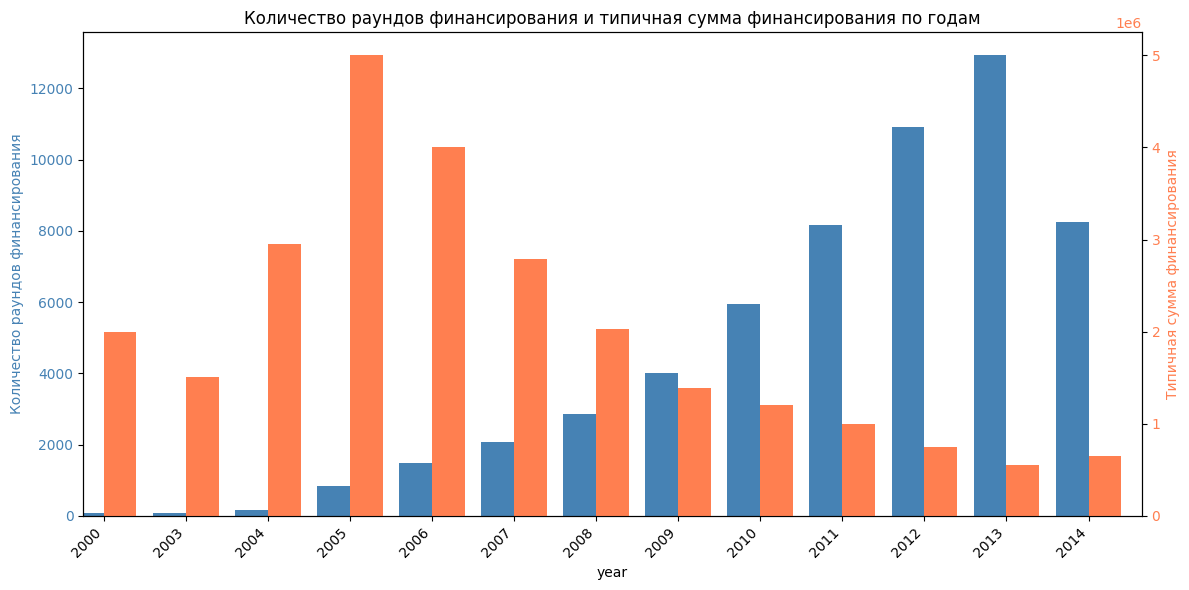

In [110]:
plot_data=pd.DataFrame()
plot_data['activity']=final_data.groupby('year')['funding_rounds'].sum()
plot_data['median_sum']=final_data.groupby('year')['sum_per_round'].median()


# investment_activity=final_data.groupby('year')['funding_rounds'].sum()
# investment_activity.plot(
#     kind='bar',
#     title='Динамика активности инвестирования (количества раундов) по годам',
#     xlabel='Год',
#     ylabel='Суммарное количество раундов'
# )

# typical_sum_per_round=final_data.groupby('year')['sum_per_round'].median()
# typical_sum_per_round.plot(
#     kind='bar',
#     title='Типичная сумма инвестирования за раунд по годам',
#     xlabel='Год',
#     ylabel='Сумма'
# )



# plot_data=pd.DataFrame()
# plot_data['sum']=final_data[finance_columns].sum()
# plot_data['count']=(final_data[finance_columns] > 0).sum()


fig, ax1 = plt.subplots(figsize=(12, 6))

plot_data['activity'].plot(
    kind='bar', 
    ax=ax1, 
    position=1, 
    width=0.4,
    color='steelblue')
ax1.set_ylabel('Количество раундов финансирования', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(plot_data.index, rotation=45, ha='right')

ax2 = ax1.twinx()
plot_data['median_sum'].plot(kind='bar', color='coral', ax=ax2, position=0, width=0.4)
ax2.set_ylabel('Типичная сумма финансирования', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.title('Количество раундов финансирования и типичная сумма финансирования по годам')
plt.tight_layout()
plt.show()

2005 год стал годом восстановления и трансформации мирового инвестиционного ландшафта. Ключевыми событиями стали рекордный рост глобальных инвестиций, усиление роли развивающихся стран и появление новых стратегических трендов, таких как двусторонние потоки инвестиций и интернационализация НИОКР. Из-за этого распределение по суммам финансирования и количеству раунда поменялась от 2000х к 2010м годам. 

В 2000х:

- Много экспериментов с маленькими суммами

- Инвесторы пробуют, учатся, ошибаются

- Стартапы получают финансирование понемногу, несколькими раундами

в 2010х:

- Появились проверенные модели бизнеса

- Инвесторы научились отличать перспективные проекты

- Стали давать больше денег, но более избирательно

Инвесторы поняли, что лучше финансировать меньше проектов, но давать им достаточно средств для реального роста. По сути, рынок прошел естественный путь от "давайте попробуем много разных идей" к "давайте хорошо финансировать самые перспективные идеи". Это признак зрелости индустрии.

### Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов


In [111]:
#Создадим сводную таблицу с информацией по финансированию в различных сегментах по годам
pivot_data=final_data[(final_data['market']!='niche')&(final_data['market']!='mid')&(final_data['market']!='unknown')]
funding_by_segment = pd.pivot_table(pivot_data,
                             index="market",
                             columns="year",
                             values="funding_total_usd",
                             aggfunc="sum")
#Добавим столбец с отношением финансированием по сегменту рынка за 2014 к 2013 году
funding_by_segment['growth_2014_2013'] = funding_by_segment[2014]/funding_by_segment[2013]*100 #рост в относительных значениях
funding_by_segment['diff_2014_2013']= funding_by_segment[2014]-funding_by_segment[2013] #рост в абсолютных значениях
#Отфильтруем сегменты, по которым наблюдается рост от 2013 к 2014 году
funding_by_segment[funding_by_segment['growth_2014_2013']>100][[2013, 2014,'growth_2014_2013','diff_2014_2013']].sort_values(by='growth_2014_2013',ascending=False)

year,2013,2014,growth_2014_2013,diff_2014_2013
market,,,,
technology,85348190.0,246187120.0,288.450312,160838930.0
medical,70141340.0,176350145.0,251.421123,106208805.0
startups,18962154.0,42853837.0,225.996672,23891683.0
internet,59449928.0,117830756.0,198.201680,58380828.0
apps,34929001.0,69037730.0,197.651602,34108729.0
saas,75418113.0,102857752.0,136.383354,27439639.0
entertainment,59558143.0,75208184.0,126.276912,15650041.0
manufacturing,385782715.0,479145029.0,124.200751,93362314.0
photography,47732979.0,55297850.0,115.848311,7564871.0


По полученной сводной таблице можем оценить рост по сегментам в абсолютных и относительных значениях от 2013 к 2014 году. 

Самый большой рост в абсолютных и относительных значениях сфере технологий высокий (почти 290%) относительный рост, а также в медицине (около 250%)

В абсолютных значениях высокий рост наблюдается также в сфере производства.  

In [112]:
growing_segments=funding_by_segment[funding_by_segment['growth_2014_2013']>100][[2013, 2014,'growth_2014_2013','diff_2014_2013']].sort_values(by='growth_2014_2013',ascending=False).index.tolist()
growing_segments

['technology',
 'medical',
 'startups',
 'internet',
 'apps',
 'saas',
 'entertainment',
 'manufacturing',
 'photography',
 'marketplaces',
 'design']

In [113]:
plot_data=funding_by_segment[funding_by_segment.index.isin(growing_segments)]
plot_data=plot_data.drop('growth_2014_2013',  axis=1)
plot_data=plot_data.drop('diff_2014_2013', axis=1)
plot_data

year,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
market,,,,,,,,,,,,,
apps,NaN,NaN,NaN,NaN,NaN,1310600.0,3050000.0,4200000.0,8542779.0,10685736.0,33279080.0,34929001.0,69037730.0
design,NaN,NaN,NaN,9300000.0,707000.0,10800000.0,344302.0,2150144.0,8669655.0,19031825.0,35717934.0,68837755.0,69060816.0
entertainment,100000.0,NaN,NaN,27450000.0,1800000.0,15524025.0,20650000.0,22269585.0,3847608.0,46716762.0,26192770.0,59558143.0,75208184.0
internet,10000000.0,NaN,NaN,12275000.0,5000.0,540000.0,26388343.0,21925773.0,26978058.0,38371042.0,63988285.0,59449928.0,117830756.0
manufacturing,56659310.0,4269608.0,29000000.0,50660000.0,90379529.0,153190008.0,123868732.0,352719349.0,316173065.0,564948500.0,564946728.0,385782715.0,479145029.0
marketplaces,NaN,NaN,NaN,NaN,NaN,NaN,3885720.0,550000.0,4805949.0,11646932.0,22371445.0,40256893.0,41217341.0
medical,24000000.0,NaN,NaN,11090000.0,20250000.0,2100000.0,28812744.0,13805120.0,12376418.0,9379931.0,67389634.0,70141340.0,176350145.0
photography,NaN,NaN,7100000.0,2000000.0,11686406.0,10764586.0,23659381.0,12922378.0,30159227.0,11966017.0,66897519.0,47732979.0,55297850.0
saas,NaN,NaN,NaN,7240000.0,4069241.0,4957000.0,15200068.0,33559012.0,14056812.0,41923922.0,55082697.0,75418113.0,102857752.0


<Figure size 1500x800 with 0 Axes>

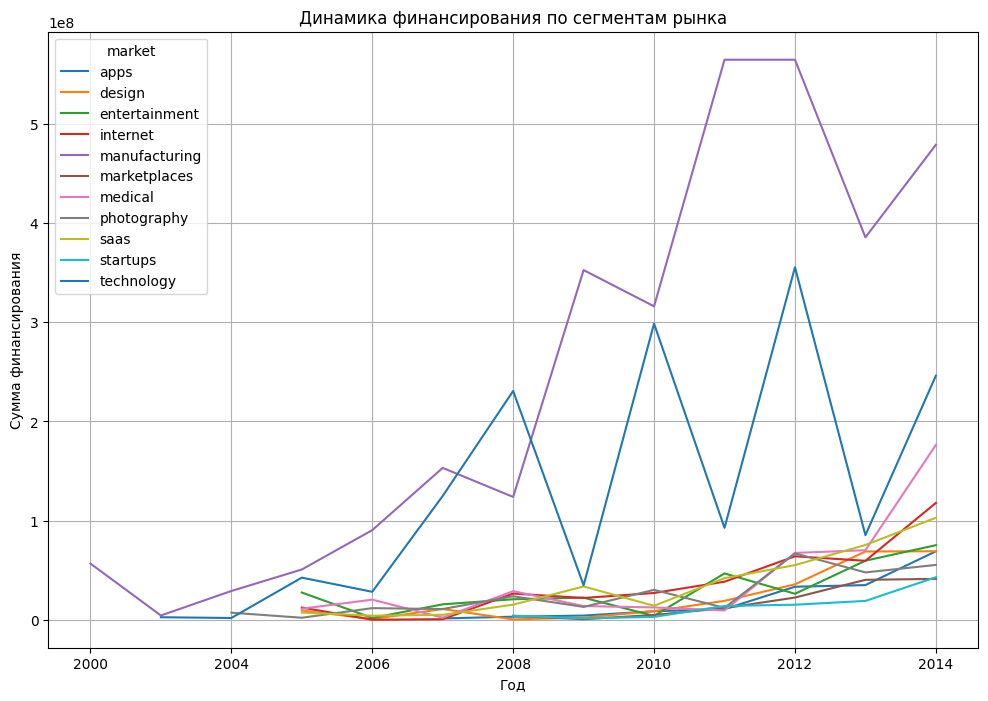

In [114]:
plt.figure(figsize=(15, 8))
plot_data.T.plot(kind='line', figsize=(12, 8))
plt.xlabel('Год')
plt.ylabel('Сумма финансирования')
plt.title('Динамика финансирования по сегментам рынка')
plt.grid(True)
plt.show()

Среди отобранных сегментов рынка для сферы производства наблюдается тенденция к сильному росту по годам с 2000 по 2014. В сфере мобильных приложений наблюдается скачкообразная тенденция, где по годам чередуется высокое и умеренное финансирование, но в целом можно проследить тенденцию к небольшому росту. 
Среди остальных сегментов рынка можно отметить сферу медицины, в которой наблюдается существенный относительный рост с 2011 к 2014 году. 

### Годовая динамика доли возвращённых средств по типам финансирования

In [115]:
returns_df

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.00,0.20,0.00
2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.00,0.46,0.00
2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.00,0.06,0.00
2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.00,0.08,0.00
2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.00,0.55,0.00
2005,26.60,2628.92,0.00,9.51,0.02,35.09,31.06,0.0,2.40,3.51,0.00,0.05,0.00
2006,61.81,3100.18,0.19,46.74,1.78,113.21,47.75,0.0,16.67,20.58,0.00,0.12,0.00
2007,70.41,3585.37,0.01,55.37,3.22,125.68,164.51,0.0,88.81,24.36,0.00,0.57,0.00
2008,89.72,2717.02,0.03,41.02,1.71,397.54,102.83,0.0,130.38,84.28,0.00,0.47,0.00


In [116]:
pivot_tables = []
for col in finance_columns:
    table = final_data.groupby('year')[col].sum()
    pivot_tables.append(table)

total_by_segment_year = pd.concat(pivot_tables, axis=1)
total_by_segment_year

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,10759140,205636474,0,112202640,0,4000000,23610000,0,0,0,0,0,0
2003,5810416,284315827,0,16749186,0,4350000,6600000,0,0,0,0,0,0
2004,18514728,668357442,0,59017550,6765834,27500000,6603102,8923600,12000000,0,0,0,0
2005,28334419,4813250035,0,3460877,0,30133622,40158800,10742481,0,0,0,0,0
2006,55035828,8341660595,0,32541204,0,85919460,53501836,750000,2533644,3467747,0,7718867,0
2007,149486133,8997715304,0,100814521,5917734,128885728,153428975,41872245,72873563,0,0,0,0
2008,238443910,11149384478,933057,61960961,11165762,347240780,224118892,17451541,144448891,0,0,0,0
2009,245104521,12438910461,0,152564801,49918512,749493091,159363554,171315784,138038300,5796022,0,19300000,0
2010,424584443,16546688122,400000,212584633,38207000,1082000199,244079849,146971949,420387463,26164346,0,910000,0


In [117]:
return_share = (returns_df).div(total_by_segment_year/1000000, fill_value=0)
return_share = return_share.replace([np.inf, -np.inf], np.nan)  # Заменяем бесконечности на NaN

return_share



,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,1.552169,0.269407,NaN,0.697042,NaN,2.165000,0.272342,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,1.332091,0.822536,NaN,0.561221,NaN,0.250575,0.516667,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.536330,0.831741,NaN,0.562375,0.001478,0.492727,1.390256,0.0,0.182500,NaN,NaN,NaN,NaN
2005,0.938788,0.546184,NaN,2.747858,NaN,1.164480,0.773429,0.0,NaN,NaN,NaN,NaN,NaN
2006,1.123087,0.371650,NaN,1.436333,NaN,1.317629,0.892493,0.0,6.579456,5.934689,NaN,0.015546,NaN
2007,0.471014,0.398476,NaN,0.549226,0.544127,0.975127,1.072223,0.0,1.218686,NaN,NaN,NaN,NaN
2008,0.376273,0.243692,0.032152,0.662030,0.153147,1.144854,0.458819,0.0,0.902603,NaN,NaN,NaN,NaN


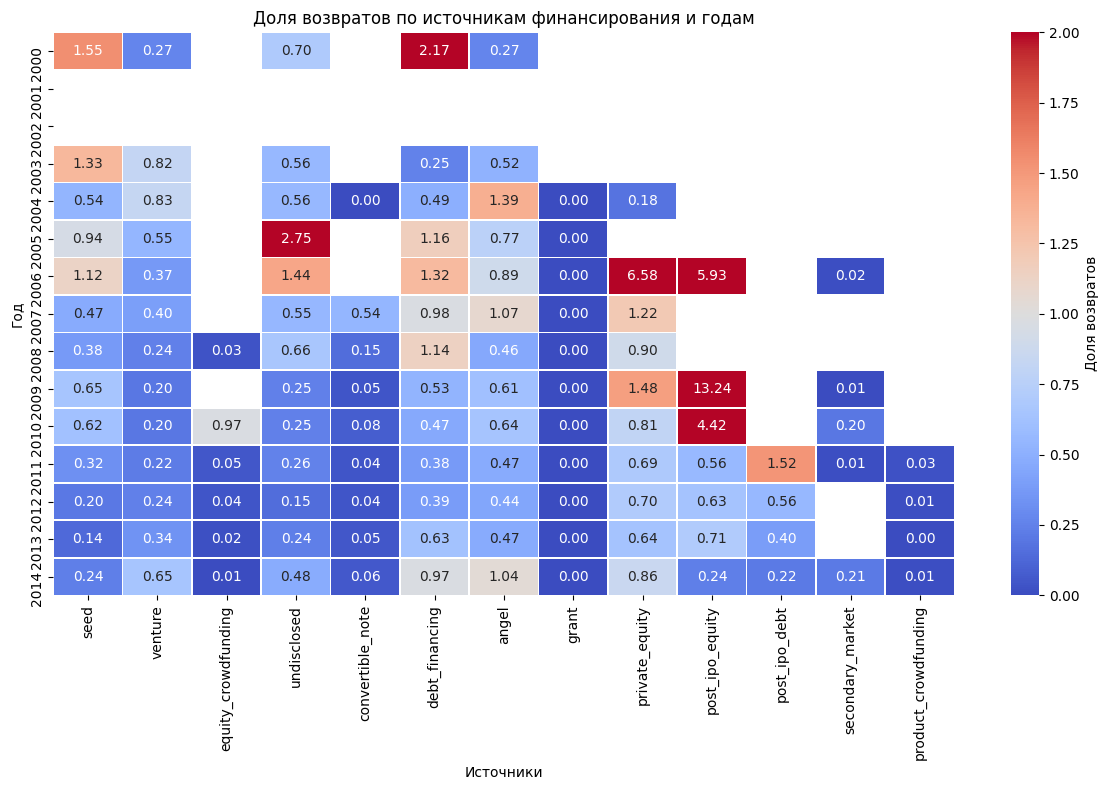

In [118]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data=return_share, 
            annot=True,
            fmt='.2f',
            linewidths=0.5, 
            cmap='coolwarm',
            vmin=0,vmax=2, 
            cbar_kws={'label': 'Доля возвратов'}) 

# Добавляем заголовок и настраиваем внешний вид
plt.title('Доля возвратов по источникам финансирования и годам')
plt.xlabel('Источники')
plt.ylabel('Год')
plt.tight_layout()
plt.show()

In [119]:
#Создадим сводную таблицу с информацией по финансированию в различных сегментах по годам по всему датасету
pivot_table_full=[]
final_data['year'] = final_data['mid_funding_at'].dt.year
for col in finance_columns:
    table = final_data.groupby('year')[col].sum()
    pivot_table_full.append(table)

total_by_segment_year = pd.concat(pivot_table_full, axis=1)
total_by_segment_year

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,10759140,205636474,0,112202640,0,4000000,23610000,0,0,0,0,0,0
2003,5810416,284315827,0,16749186,0,4350000,6600000,0,0,0,0,0,0
2004,18514728,668357442,0,59017550,6765834,27500000,6603102,8923600,12000000,0,0,0,0
2005,28334419,4813250035,0,3460877,0,30133622,40158800,10742481,0,0,0,0,0
2006,55035828,8341660595,0,32541204,0,85919460,53501836,750000,2533644,3467747,0,7718867,0
2007,149486133,8997715304,0,100814521,5917734,128885728,153428975,41872245,72873563,0,0,0,0
2008,238443910,11149384478,933057,61960961,11165762,347240780,224118892,17451541,144448891,0,0,0,0
2009,245104521,12438910461,0,152564801,49918512,749493091,159363554,171315784,138038300,5796022,0,19300000,0
2010,424584443,16546688122,400000,212584633,38207000,1082000199,244079849,146971949,420387463,26164346,0,910000,0


In [120]:
return_share = (returns_df).div(total_by_segment_year/1000000, fill_value=0)
return_share = return_share.replace([np.inf, -np.inf], np.nan)  # Заменяем бесконечности на NaN
return_share


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,1.552169,0.269407,NaN,0.697042,NaN,2.165000,0.272342,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,1.332091,0.822536,NaN,0.561221,NaN,0.250575,0.516667,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.536330,0.831741,NaN,0.562375,0.001478,0.492727,1.390256,0.0,0.182500,NaN,NaN,NaN,NaN
2005,0.938788,0.546184,NaN,2.747858,NaN,1.164480,0.773429,0.0,NaN,NaN,NaN,NaN,NaN
2006,1.123087,0.371650,NaN,1.436333,NaN,1.317629,0.892493,0.0,6.579456,5.934689,NaN,0.015546,NaN
2007,0.471014,0.398476,NaN,0.549226,0.544127,0.975127,1.072223,0.0,1.218686,NaN,NaN,NaN,NaN
2008,0.376273,0.243692,0.032152,0.662030,0.153147,1.144854,0.458819,0.0,0.902603,NaN,NaN,NaN,NaN


In [121]:
def handle_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.where((series >= lower_bound) & (series <= upper_bound))
return_ratios_clean = return_share.copy()
for i in finance_columns:
    return_ratios_clean[i] = handle_outliers_iqr(return_share[i])


return_ratios_clean

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,1.552169,0.269407,NaN,0.697042,NaN,NaN,0.272342,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,1.332091,0.822536,NaN,0.561221,NaN,0.250575,0.516667,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.536330,0.831741,NaN,0.562375,0.001478,0.492727,1.390256,0.0,0.182500,NaN,NaN,NaN,NaN
2005,0.938788,0.546184,NaN,NaN,NaN,1.164480,0.773429,0.0,NaN,NaN,NaN,NaN,NaN
2006,1.123087,0.371650,NaN,NaN,NaN,1.317629,0.892493,0.0,NaN,5.934689,NaN,0.015546,NaN
2007,0.471014,0.398476,NaN,0.549226,NaN,0.975127,1.072223,0.0,1.218686,NaN,NaN,NaN,NaN
2008,0.376273,0.243692,0.032152,0.662030,NaN,1.144854,0.458819,0.0,0.902603,NaN,NaN,NaN,NaN


<Figure size 1500x800 with 0 Axes>

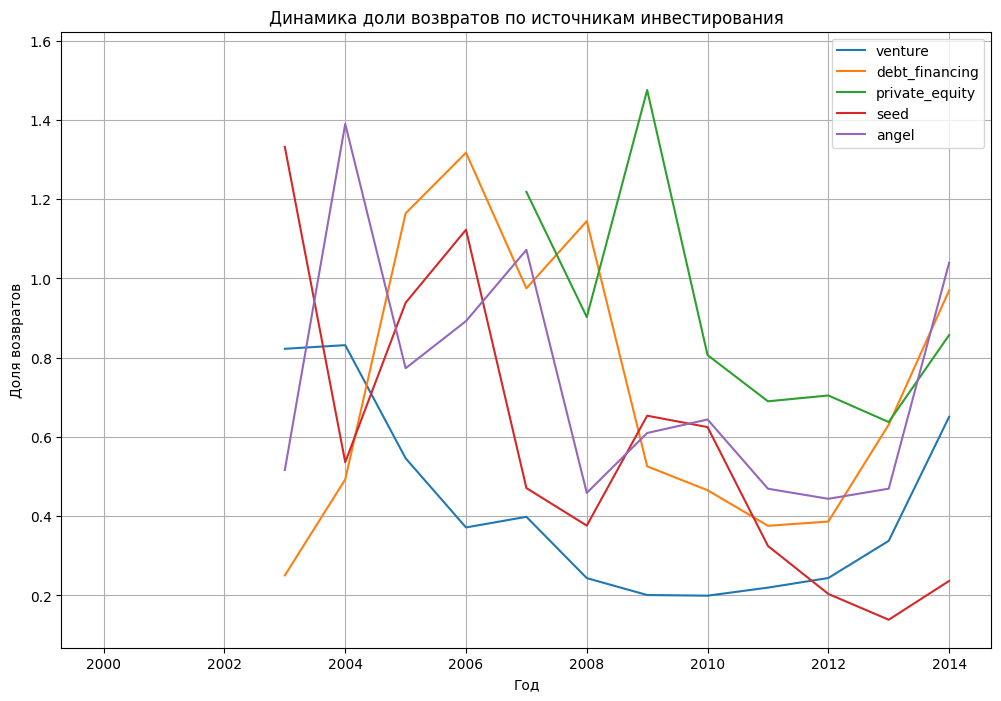

In [122]:
plt.figure(figsize=(15, 8))
return_ratios_clean[['venture', 'debt_financing', 'private_equity', 'seed', 'angel']].plot(kind='line', figsize=(12, 8))
plt.xlabel('Год')
plt.ylabel('Доля возвратов')
plt.title('Динамика доли возвратов по источникам инвестирования')
plt.grid(True)
plt.show()

<!-- По всем рассматриваемым источникам финансирования от 2013 к 2014 наблюдается рост доли возвратов инвестиций. Наиболее сильный рост - для инвестиций от бизнес-ангелов.   -->

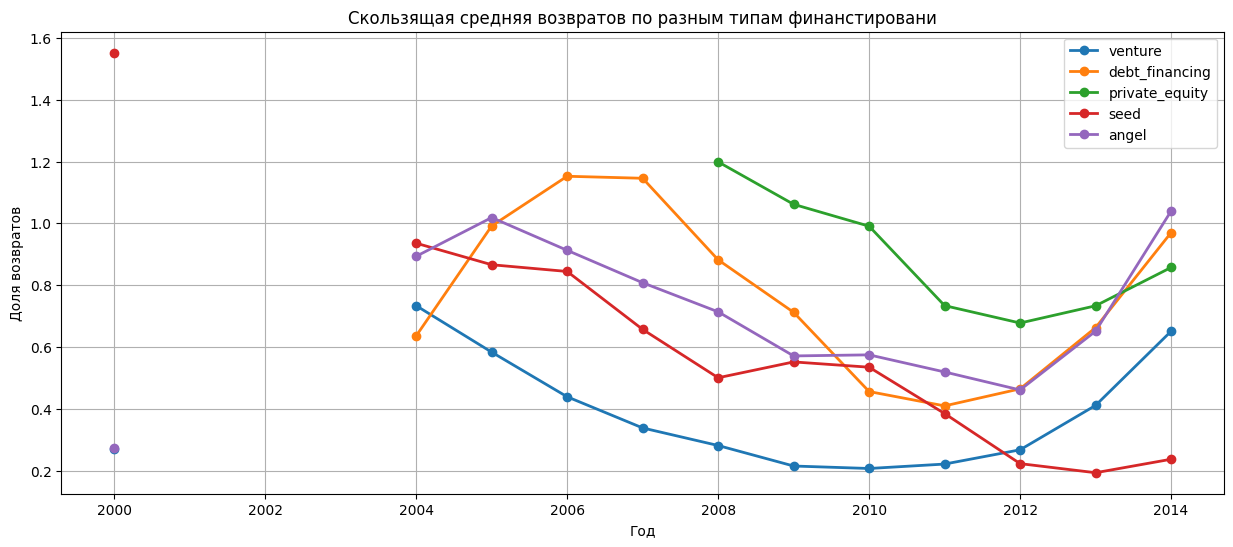

In [123]:
years = return_ratios_clean.index.tolist()
data = {}
for column in ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']:
    data[column] = return_ratios_clean[column].tolist()

plt.figure(figsize=(15, 6))

for column, values in data.items():
    smoothed = []
    for i in range(len(values)):
        if i == 0 or i == len(values)-1:
            smoothed.append(values[i])
        else:
            window_vals = [v for v in values[i-1:i+2] if v is not None]
            if window_vals:
                smoothed.append(sum(window_vals) / len(window_vals))
            else:
                smoothed.append(None)
    
    plt.plot(years, smoothed, label=column, linewidth=2, marker='o')

plt.xlabel('Год')
plt.ylabel('Доля возвратов')
plt.title('Скользящая средняя возвратов по разным типам финанстировани')
plt.grid(True)
plt.legend()
plt.show()

#### Промежуточные выводы:


Динамика предоставления финансирования по годам:

- Типичный размер раунда финансирования составляет от 200,000 до 3,200,000 USD, с медианным значением 1,000,000 USD

- В 2014 году наблюдается спад инвестиционной активности - количество раундов финансирования снизилось на 36% по сравнению с 2013 годом

- Тенденция рынка: переход от большого количества небольших раундов в 2000-х годах к меньшему количеству, но более крупных раундов в 2010-х годах

- Пик типичной суммы раунда пришелся на 2005 год (около 6,000,000 USD)

Динамика по растущим сегментам рынка:

- Технологии: абсолютный лидер по относительному росту (+290% с 2013 по 2014 год)

- Медицина: демонстрирует устойчивый рост с 2011 года (+250% за год)

- Производство: показывает стабильный рост на протяжении всего анализируемого периода

- Мобильные приложения: несмотря на волатильность, общая тенденция положительная

Динамика возвратов средств:

- Положительная тенденция: по всем основным типам финансирования наблюдается рост доли возвратов с 2013 по 2014 год

- Лидер роста возвратов - Angel-инвестиции: наиболее значительный рост доли возвратов





## Итоговый вывод и рекомендации

### Рекомендации по инвестированию


Приоритетные отрасли для инвестиций:

- Технологический сектор - демонстрирует наибольший относительный рост (+290%) и перспективы дальнейшего развития

- Медицинский сектор - показывает устойчивый рост с 2011 года и высокую социальную значимость

- Производственный сектор - стабильный рост на протяжении всего анализируемого периода

Рекомендуемые типы финансирования:

- Angel инвестиции - наибольший рост доли возвратов при умеренных объемах

- Venture капитал - оптимальное сочетание объема, популярности и растущей доходности


Стратегические рекомендации на 2015 год:

- Сфокусироваться на технологическом, производственном и медицинском секторах

- Использовать комбинированный подход финансирования: angel + venture


### Итоги проекта


- Выполнена предобработка данных с очисткой и преобразованием типов

- Выполнена категоризация периодов финансирования и сегментов рынка

- Обработаны выбросы по сумме финансирования на основании метода IQR

- Проанализирована динамика финансирования и возвратов

- Проведен сравнительный анализ типов финансирования и отраслевых тенденций

- Выявленные растущие сектора (технологии, медицина)

- Рекомендуемые типы финансирования подтверждаются анализом как объемов, так и возвратов

Временные тренды показывают устойчивые паттерны развития рынка

Общая рекомендация: В условиях 2015 года наиболее перспективной стратегией является фокус на технологический сектор с комбинацией angel и venture финансирования, что обеспечит баланс между ростом и надежностью возвратов инвестиций.

